# Training MIMOnet

MIMO: Multiple Input Multiple Outputs.

In [2]:
input_patch_size = [375,375] # input patch (expect output to be smaller)
input_channels = [3] # RGB
output_channels = [2] #cell and bkg
NBATCH = 5 # example patch per batch
EPCS = 500 # epochs
REG = True # regularization
USEW = True # use weights
NAME_NET = 'MIMO_FULL_W' # name for saving
JT = False # Just train set means no evaluation during training 

In [3]:
import keras
import sys
sys.path.append('../')
from datasets import CD_Dataset
from models import MimoNet
from utility import show_batches, from_categorical, train, evaluate
import numpy as np
from datasets import combine_y_w
import keras
import time
import matplotlib.pyplot as plt

seed = int((time.time()*1e6)%1e6)
np.random.seed(seed)
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=seed)

dataset_path = '../CD_Dataset'
trained_models_path = '../trained_models'

Using TensorFlow backend.


In [4]:
dataset = CD_Dataset( path=dataset_path, train_y_path="train_y",  eval_y_path="eval_y",  fit=True, download=True, num_classes=output_channels[0] )



('mean_features: ', array([ 0.86503507,  0.83272585,  0.72929356]))
('std_features: ', array([ 0.01255889,  0.01785996,  0.05625756]))


In [5]:
means = dataset.mean_features()
stds = dataset.std_features()
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,n_batch=5 ,fit=False, rotate=False)
ys_imgs = from_categorical(ys)
#show_batches([xs,ys_imgs,ws],["xs","ys","ws"])

# Train to fit:

We will try to fit a characteristic example first: we' ll deal with generalization later.
    
    

In [25]:
from models import dice_coef, precision
model_input_size = input_patch_size + input_channels
mimo = MimoNet(model_input_size, classes=output_channels[0], metrics=[dice_coef,precision], regularized=REG)

epocs = 500

ys_mod = np.copy(ys)
x_data = (xs-means)/stds
for i in range(epocs):
    print("================== epoch: {} ==================".format(i+1))
    mimo.fit(x_data,ys_mod)  

aux confirmed
aux confirmed
================== epoch: 1 ==================
Epoch 1/1
5/5 [==============================] - 8s 2s/step - loss: 57.5852 - la1_loss: 0.1545 - la2_loss: 0.1929 - la3_loss: 0.4825 - l0_loss: 0.7209 - la1_dice_coef: 0.4807 - la1_precision: 0.0395 - la2_dice_coef: 0.5102 - la2_precision: 0.7390 - la3_dice_coef: 0.4696 - la3_precision: 0.3596 - l0_dice_coef: 0.4901 - l0_precision: 0.4197
================== epoch: 2 ==================
Epoch 1/1
5/5 [==============================] - 3s 686ms/step - loss: 55.5398 - la1_loss: 0.1510 - la2_loss: 0.1833 - la3_loss: 0.3605 - l0_loss: 0.5715 - la1_dice_coef: 0.4884 - la1_precision: 0.0697 - la2_dice_coef: 0.5311 - la2_precision: 0.9274 - la3_dice_coef: 0.5860 - la3_precision: 0.8771 - l0_dice_coef: 0.5808 - l0_precision: 0.9536
================== epoch: 3 ==================
Epoch 1/1
5/5 [==============================] - 3s 688ms/step - loss: 53.4087 - la1_loss: 0.1474 - la2_loss: 0.1716 - la3_loss: 0.3223 - l0_loss:

5/5 [==============================] - 4s 703ms/step - loss: 24.0324 - la1_loss: 0.0098 - la2_loss: 0.0082 - la3_loss: 0.0188 - l0_loss: 0.0281 - la1_dice_coef: 0.9675 - la1_precision: 0.9792 - la2_dice_coef: 0.9814 - la2_precision: 0.9891 - la3_dice_coef: 0.9809 - la3_precision: 0.9885 - l0_dice_coef: 0.9822 - l0_precision: 0.9887
================== epoch: 43 ==================
Epoch 1/1
5/5 [==============================] - 3s 699ms/step - loss: 23.7235 - la1_loss: 0.0101 - la2_loss: 0.0079 - la3_loss: 0.0178 - l0_loss: 0.0270 - la1_dice_coef: 0.9710 - la1_precision: 0.9761 - la2_dice_coef: 0.9841 - la2_precision: 0.9896 - la3_dice_coef: 0.9835 - la3_precision: 0.9891 - l0_dice_coef: 0.9849 - l0_precision: 0.9899
================== epoch: 44 ==================
Epoch 1/1
5/5 [==============================] - 4s 701ms/step - loss: 23.4242 - la1_loss: 0.0095 - la2_loss: 0.0081 - la3_loss: 0.0185 - l0_loss: 0.0280 - la1_dice_coef: 0.9680 - la1_precision: 0.9818 - la2_dice_coef: 0.9815 

5/5 [==============================] - 4s 700ms/step - loss: 18.7912 - la1_loss: 0.0068 - la2_loss: 0.0075 - la3_loss: 0.0169 - l0_loss: 0.0257 - la1_dice_coef: 0.9789 - la1_precision: 0.9875 - la2_dice_coef: 0.9852 - la2_precision: 0.9901 - la3_dice_coef: 0.9841 - la3_precision: 0.9897 - l0_dice_coef: 0.9854 - l0_precision: 0.9903
================== epoch: 64 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 18.5919 - la1_loss: 0.0067 - la2_loss: 0.0074 - la3_loss: 0.0169 - l0_loss: 0.0258 - la1_dice_coef: 0.9771 - la1_precision: 0.9894 - la2_dice_coef: 0.9838 - la2_precision: 0.9902 - la3_dice_coef: 0.9827 - la3_precision: 0.9898 - l0_dice_coef: 0.9839 - l0_precision: 0.9899
================== epoch: 65 ==================
Epoch 1/1
5/5 [==============================] - 4s 700ms/step - loss: 18.3951 - la1_loss: 0.0065 - la2_loss: 0.0072 - la3_loss: 0.0164 - l0_loss: 0.0250 - la1_dice_coef: 0.9798 - la1_precision: 0.9885 - la2_dice_coef: 0.9854 

5/5 [==============================] - 4s 705ms/step - loss: 15.2462 - la1_loss: 0.0056 - la2_loss: 0.0069 - la3_loss: 0.0157 - l0_loss: 0.0239 - la1_dice_coef: 0.9833 - la1_precision: 0.9901 - la2_dice_coef: 0.9855 - la2_precision: 0.9910 - la3_dice_coef: 0.9844 - la3_precision: 0.9906 - l0_dice_coef: 0.9856 - l0_precision: 0.9910
================== epoch: 85 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 15.1053 - la1_loss: 0.0056 - la2_loss: 0.0069 - la3_loss: 0.0156 - l0_loss: 0.0238 - la1_dice_coef: 0.9834 - la1_precision: 0.9902 - la2_dice_coef: 0.9856 - la2_precision: 0.9911 - la3_dice_coef: 0.9845 - la3_precision: 0.9907 - l0_dice_coef: 0.9857 - l0_precision: 0.9910
================== epoch: 86 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 14.9664 - la1_loss: 0.0055 - la2_loss: 0.0069 - la3_loss: 0.0156 - l0_loss: 0.0237 - la1_dice_coef: 0.9838 - la1_precision: 0.9901 - la2_dice_coef: 0.9858 

5/5 [==============================] - 4s 704ms/step - loss: 12.6657 - la1_loss: 0.0052 - la2_loss: 0.0066 - la3_loss: 0.0150 - l0_loss: 0.0230 - la1_dice_coef: 0.9849 - la1_precision: 0.9906 - la2_dice_coef: 0.9863 - la2_precision: 0.9914 - la3_dice_coef: 0.9852 - la3_precision: 0.9911 - l0_dice_coef: 0.9863 - l0_precision: 0.9915
================== epoch: 106 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 12.5606 - la1_loss: 0.0053 - la2_loss: 0.0067 - la3_loss: 0.0151 - l0_loss: 0.0232 - la1_dice_coef: 0.9847 - la1_precision: 0.9905 - la2_dice_coef: 0.9861 - la2_precision: 0.9912 - la3_dice_coef: 0.9850 - la3_precision: 0.9908 - l0_dice_coef: 0.9861 - l0_precision: 0.9913
================== epoch: 107 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 12.4559 - la1_loss: 0.0053 - la2_loss: 0.0066 - la3_loss: 0.0150 - l0_loss: 0.0230 - la1_dice_coef: 0.9847 - la1_precision: 0.9907 - la2_dice_coef: 0.986

================== epoch: 126 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 10.7021 - la1_loss: 0.0053 - la2_loss: 0.0067 - la3_loss: 0.0151 - l0_loss: 0.0235 - la1_dice_coef: 0.9842 - la1_precision: 0.9906 - la2_dice_coef: 0.9855 - la2_precision: 0.9910 - la3_dice_coef: 0.9845 - la3_precision: 0.9909 - l0_dice_coef: 0.9854 - l0_precision: 0.9910
================== epoch: 127 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 10.6208 - la1_loss: 0.0054 - la2_loss: 0.0068 - la3_loss: 0.0151 - l0_loss: 0.0236 - la1_dice_coef: 0.9854 - la1_precision: 0.9900 - la2_dice_coef: 0.9866 - la2_precision: 0.9909 - la3_dice_coef: 0.9856 - la3_precision: 0.9906 - l0_dice_coef: 0.9865 - l0_precision: 0.9910
================== epoch: 128 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 10.5413 - la1_loss: 0.0055 - la2_loss: 0.0070 - la3_loss: 0.0156 - l0_loss: 0.0244 - la1_dice_

5/5 [==============================] - 4s 703ms/step - loss: 7.9862 - la1_loss: 0.0051 - la2_loss: 0.0065 - la3_loss: 0.0144 - l0_loss: 0.0225 - la1_dice_coef: 0.9860 - la1_precision: 0.9907 - la2_dice_coef: 0.9870 - la2_precision: 0.9913 - la3_dice_coef: 0.9860 - la3_precision: 0.9911 - l0_dice_coef: 0.9868 - l0_precision: 0.9914
================== epoch: 168 ==================
Epoch 1/1
5/5 [==============================] - 4s 701ms/step - loss: 7.9322 - la1_loss: 0.0049 - la2_loss: 0.0063 - la3_loss: 0.0142 - l0_loss: 0.0220 - la1_dice_coef: 0.9858 - la1_precision: 0.9912 - la2_dice_coef: 0.9867 - la2_precision: 0.9917 - la3_dice_coef: 0.9856 - la3_precision: 0.9915 - l0_dice_coef: 0.9865 - l0_precision: 0.9918
================== epoch: 169 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 7.8795 - la1_loss: 0.0048 - la2_loss: 0.0063 - la3_loss: 0.0141 - l0_loss: 0.0218 - la1_dice_coef: 0.9861 - la1_precision: 0.9912 - la2_dice_coef: 0.9869 -

5/5 [==============================] - 4s 701ms/step - loss: 6.9805 - la1_loss: 0.0054 - la2_loss: 0.0069 - la3_loss: 0.0154 - l0_loss: 0.0241 - la1_dice_coef: 0.9834 - la1_precision: 0.9900 - la2_dice_coef: 0.9848 - la2_precision: 0.9906 - la3_dice_coef: 0.9837 - la3_precision: 0.9905 - l0_dice_coef: 0.9845 - l0_precision: 0.9906
================== epoch: 189 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 6.9362 - la1_loss: 0.0052 - la2_loss: 0.0067 - la3_loss: 0.0147 - l0_loss: 0.0233 - la1_dice_coef: 0.9848 - la1_precision: 0.9902 - la2_dice_coef: 0.9860 - la2_precision: 0.9909 - la3_dice_coef: 0.9850 - la3_precision: 0.9908 - l0_dice_coef: 0.9858 - l0_precision: 0.9910
================== epoch: 190 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 6.8915 - la1_loss: 0.0049 - la2_loss: 0.0064 - la3_loss: 0.0142 - l0_loss: 0.0221 - la1_dice_coef: 0.9857 - la1_precision: 0.9912 - la2_dice_coef: 0.9866 -

5/5 [==============================] - 4s 706ms/step - loss: 6.1518 - la1_loss: 0.0047 - la2_loss: 0.0061 - la3_loss: 0.0138 - l0_loss: 0.0215 - la1_dice_coef: 0.9862 - la1_precision: 0.9916 - la2_dice_coef: 0.9870 - la2_precision: 0.9919 - la3_dice_coef: 0.9860 - la3_precision: 0.9918 - l0_dice_coef: 0.9867 - l0_precision: 0.9920
================== epoch: 210 ==================
Epoch 1/1
5/5 [==============================] - 4s 701ms/step - loss: 6.1164 - la1_loss: 0.0047 - la2_loss: 0.0062 - la3_loss: 0.0138 - l0_loss: 0.0215 - la1_dice_coef: 0.9866 - la1_precision: 0.9914 - la2_dice_coef: 0.9873 - la2_precision: 0.9918 - la3_dice_coef: 0.9863 - la3_precision: 0.9916 - l0_dice_coef: 0.9871 - l0_precision: 0.9919
================== epoch: 211 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 6.0809 - la1_loss: 0.0047 - la2_loss: 0.0061 - la3_loss: 0.0138 - l0_loss: 0.0215 - la1_dice_coef: 0.9863 - la1_precision: 0.9916 - la2_dice_coef: 0.9870 -

5/5 [==============================] - 4s 704ms/step - loss: 5.4633 - la1_loss: 0.0047 - la2_loss: 0.0061 - la3_loss: 0.0137 - l0_loss: 0.0213 - la1_dice_coef: 0.9868 - la1_precision: 0.9915 - la2_dice_coef: 0.9875 - la2_precision: 0.9918 - la3_dice_coef: 0.9864 - la3_precision: 0.9917 - l0_dice_coef: 0.9872 - l0_precision: 0.9919
================== epoch: 231 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 5.4334 - la1_loss: 0.0047 - la2_loss: 0.0061 - la3_loss: 0.0137 - l0_loss: 0.0214 - la1_dice_coef: 0.9866 - la1_precision: 0.9915 - la2_dice_coef: 0.9873 - la2_precision: 0.9918 - la3_dice_coef: 0.9863 - la3_precision: 0.9917 - l0_dice_coef: 0.9870 - l0_precision: 0.9919
================== epoch: 232 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 5.4033 - la1_loss: 0.0046 - la2_loss: 0.0060 - la3_loss: 0.0136 - l0_loss: 0.0212 - la1_dice_coef: 0.9866 - la1_precision: 0.9917 - la2_dice_coef: 0.9873 -

5/5 [==============================] - 4s 704ms/step - loss: 4.8824 - la1_loss: 0.0047 - la2_loss: 0.0061 - la3_loss: 0.0137 - l0_loss: 0.0215 - la1_dice_coef: 0.9869 - la1_precision: 0.9912 - la2_dice_coef: 0.9876 - la2_precision: 0.9917 - la3_dice_coef: 0.9865 - la3_precision: 0.9915 - l0_dice_coef: 0.9873 - l0_precision: 0.9917
================== epoch: 252 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 4.8564 - la1_loss: 0.0046 - la2_loss: 0.0061 - la3_loss: 0.0137 - l0_loss: 0.0213 - la1_dice_coef: 0.9863 - la1_precision: 0.9918 - la2_dice_coef: 0.9870 - la2_precision: 0.9919 - la3_dice_coef: 0.9859 - la3_precision: 0.9920 - l0_dice_coef: 0.9866 - l0_precision: 0.9920
================== epoch: 253 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 4.8313 - la1_loss: 0.0046 - la2_loss: 0.0061 - la3_loss: 0.0136 - l0_loss: 0.0213 - la1_dice_coef: 0.9872 - la1_precision: 0.9915 - la2_dice_coef: 0.9878 -

5/5 [==============================] - 4s 703ms/step - loss: 4.3868 - la1_loss: 0.0044 - la2_loss: 0.0059 - la3_loss: 0.0133 - l0_loss: 0.0207 - la1_dice_coef: 0.9871 - la1_precision: 0.9921 - la2_dice_coef: 0.9877 - la2_precision: 0.9922 - la3_dice_coef: 0.9866 - la3_precision: 0.9921 - l0_dice_coef: 0.9873 - l0_precision: 0.9923
================== epoch: 273 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 4.3652 - la1_loss: 0.0044 - la2_loss: 0.0059 - la3_loss: 0.0133 - l0_loss: 0.0207 - la1_dice_coef: 0.9873 - la1_precision: 0.9919 - la2_dice_coef: 0.9878 - la2_precision: 0.9922 - la3_dice_coef: 0.9867 - la3_precision: 0.9920 - l0_dice_coef: 0.9875 - l0_precision: 0.9922
================== epoch: 274 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 4.3439 - la1_loss: 0.0045 - la2_loss: 0.0059 - la3_loss: 0.0134 - l0_loss: 0.0208 - la1_dice_coef: 0.9869 - la1_precision: 0.9920 - la2_dice_coef: 0.9874 -

5/5 [==============================] - 4s 701ms/step - loss: 3.9623 - la1_loss: 0.0044 - la2_loss: 0.0058 - la3_loss: 0.0132 - l0_loss: 0.0205 - la1_dice_coef: 0.9872 - la1_precision: 0.9922 - la2_dice_coef: 0.9877 - la2_precision: 0.9922 - la3_dice_coef: 0.9866 - la3_precision: 0.9921 - l0_dice_coef: 0.9873 - l0_precision: 0.9924
================== epoch: 294 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 3.9440 - la1_loss: 0.0044 - la2_loss: 0.0059 - la3_loss: 0.0132 - l0_loss: 0.0207 - la1_dice_coef: 0.9874 - la1_precision: 0.9919 - la2_dice_coef: 0.9879 - la2_precision: 0.9921 - la3_dice_coef: 0.9868 - la3_precision: 0.9919 - l0_dice_coef: 0.9875 - l0_precision: 0.9921
================== epoch: 295 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 3.9253 - la1_loss: 0.0044 - la2_loss: 0.0059 - la3_loss: 0.0132 - l0_loss: 0.0206 - la1_dice_coef: 0.9872 - la1_precision: 0.9921 - la2_dice_coef: 0.9877 -

5/5 [==============================] - 4s 702ms/step - loss: 3.5948 - la1_loss: 0.0043 - la2_loss: 0.0058 - la3_loss: 0.0130 - l0_loss: 0.0203 - la1_dice_coef: 0.9875 - la1_precision: 0.9923 - la2_dice_coef: 0.9879 - la2_precision: 0.9923 - la3_dice_coef: 0.9868 - la3_precision: 0.9922 - l0_dice_coef: 0.9875 - l0_precision: 0.9924
================== epoch: 315 ==================
Epoch 1/1
5/5 [==============================] - 3s 700ms/step - loss: 3.5787 - la1_loss: 0.0043 - la2_loss: 0.0058 - la3_loss: 0.0130 - l0_loss: 0.0203 - la1_dice_coef: 0.9876 - la1_precision: 0.9923 - la2_dice_coef: 0.9880 - la2_precision: 0.9923 - la3_dice_coef: 0.9868 - la3_precision: 0.9922 - l0_dice_coef: 0.9876 - l0_precision: 0.9924
================== epoch: 316 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 3.5627 - la1_loss: 0.0043 - la2_loss: 0.0058 - la3_loss: 0.0130 - l0_loss: 0.0204 - la1_dice_coef: 0.9874 - la1_precision: 0.9922 - la2_dice_coef: 0.9879 -

5/5 [==============================] - 4s 706ms/step - loss: 3.2789 - la1_loss: 0.0048 - la2_loss: 0.0062 - la3_loss: 0.0138 - l0_loss: 0.0219 - la1_dice_coef: 0.9871 - la1_precision: 0.9910 - la2_dice_coef: 0.9878 - la2_precision: 0.9915 - la3_dice_coef: 0.9868 - la3_precision: 0.9913 - l0_dice_coef: 0.9875 - l0_precision: 0.9916
================== epoch: 336 ==================
Epoch 1/1
5/5 [==============================] - 4s 700ms/step - loss: 3.2648 - la1_loss: 0.0047 - la2_loss: 0.0063 - la3_loss: 0.0139 - l0_loss: 0.0221 - la1_dice_coef: 0.9857 - la1_precision: 0.9914 - la2_dice_coef: 0.9864 - la2_precision: 0.9914 - la3_dice_coef: 0.9854 - la3_precision: 0.9916 - l0_dice_coef: 0.9860 - l0_precision: 0.9915
================== epoch: 337 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 3.2512 - la1_loss: 0.0048 - la2_loss: 0.0063 - la3_loss: 0.0138 - l0_loss: 0.0221 - la1_dice_coef: 0.9870 - la1_precision: 0.9911 - la2_dice_coef: 0.9876 -

5/5 [==============================] - 4s 706ms/step - loss: 2.9995 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0129 - l0_loss: 0.0202 - la1_dice_coef: 0.9876 - la1_precision: 0.9926 - la2_dice_coef: 0.9879 - la2_precision: 0.9924 - la3_dice_coef: 0.9868 - la3_precision: 0.9923 - l0_dice_coef: 0.9875 - l0_precision: 0.9926
================== epoch: 357 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 2.9870 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0128 - l0_loss: 0.0201 - la1_dice_coef: 0.9879 - la1_precision: 0.9923 - la2_dice_coef: 0.9882 - la2_precision: 0.9924 - la3_dice_coef: 0.9872 - la3_precision: 0.9923 - l0_dice_coef: 0.9879 - l0_precision: 0.9925
================== epoch: 358 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 2.9749 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0129 - l0_loss: 0.0201 - la1_dice_coef: 0.9877 - la1_precision: 0.9925 - la2_dice_coef: 0.9881 -

5/5 [==============================] - 4s 706ms/step - loss: 2.7561 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0128 - l0_loss: 0.0200 - la1_dice_coef: 0.9879 - la1_precision: 0.9925 - la2_dice_coef: 0.9882 - la2_precision: 0.9924 - la3_dice_coef: 0.9870 - la3_precision: 0.9923 - l0_dice_coef: 0.9877 - l0_precision: 0.9925
================== epoch: 378 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 2.7453 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0128 - l0_loss: 0.0200 - la1_dice_coef: 0.9881 - la1_precision: 0.9922 - la2_dice_coef: 0.9884 - la2_precision: 0.9924 - la3_dice_coef: 0.9873 - la3_precision: 0.9922 - l0_dice_coef: 0.9880 - l0_precision: 0.9924
================== epoch: 379 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 2.7346 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0129 - l0_loss: 0.0201 - la1_dice_coef: 0.9876 - la1_precision: 0.9926 - la2_dice_coef: 0.9879 -

5/5 [==============================] - 4s 706ms/step - loss: 2.5392 - la1_loss: 0.0041 - la2_loss: 0.0056 - la3_loss: 0.0127 - l0_loss: 0.0198 - la1_dice_coef: 0.9881 - la1_precision: 0.9926 - la2_dice_coef: 0.9884 - la2_precision: 0.9925 - la3_dice_coef: 0.9872 - la3_precision: 0.9923 - l0_dice_coef: 0.9879 - l0_precision: 0.9926
================== epoch: 399 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 2.5298 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0127 - l0_loss: 0.0200 - la1_dice_coef: 0.9882 - la1_precision: 0.9923 - la2_dice_coef: 0.9884 - la2_precision: 0.9924 - la3_dice_coef: 0.9873 - la3_precision: 0.9922 - l0_dice_coef: 0.9880 - l0_precision: 0.9924
================== epoch: 400 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 2.5202 - la1_loss: 0.0041 - la2_loss: 0.0057 - la3_loss: 0.0128 - l0_loss: 0.0200 - la1_dice_coef: 0.9878 - la1_precision: 0.9926 - la2_dice_coef: 0.9880 -

5/5 [==============================] - 4s 700ms/step - loss: 2.3454 - la1_loss: 0.0040 - la2_loss: 0.0055 - la3_loss: 0.0125 - l0_loss: 0.0194 - la1_dice_coef: 0.9883 - la1_precision: 0.9929 - la2_dice_coef: 0.9884 - la2_precision: 0.9927 - la3_dice_coef: 0.9872 - la3_precision: 0.9926 - l0_dice_coef: 0.9880 - l0_precision: 0.9928
================== epoch: 420 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 2.3371 - la1_loss: 0.0040 - la2_loss: 0.0056 - la3_loss: 0.0126 - l0_loss: 0.0196 - la1_dice_coef: 0.9885 - la1_precision: 0.9927 - la2_dice_coef: 0.9886 - la2_precision: 0.9926 - la3_dice_coef: 0.9874 - la3_precision: 0.9925 - l0_dice_coef: 0.9882 - l0_precision: 0.9926
================== epoch: 421 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 2.3298 - la1_loss: 0.0043 - la2_loss: 0.0057 - la3_loss: 0.0128 - l0_loss: 0.0203 - la1_dice_coef: 0.9881 - la1_precision: 0.9922 - la2_dice_coef: 0.9884 -

5/5 [==============================] - 4s 704ms/step - loss: 2.1720 - la1_loss: 0.0039 - la2_loss: 0.0054 - la3_loss: 0.0124 - l0_loss: 0.0192 - la1_dice_coef: 0.9886 - la1_precision: 0.9931 - la2_dice_coef: 0.9886 - la2_precision: 0.9928 - la3_dice_coef: 0.9874 - la3_precision: 0.9926 - l0_dice_coef: 0.9882 - l0_precision: 0.9928
================== epoch: 441 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 2.1647 - la1_loss: 0.0040 - la2_loss: 0.0055 - la3_loss: 0.0125 - l0_loss: 0.0194 - la1_dice_coef: 0.9886 - la1_precision: 0.9927 - la2_dice_coef: 0.9886 - la2_precision: 0.9926 - la3_dice_coef: 0.9874 - la3_precision: 0.9924 - l0_dice_coef: 0.9883 - l0_precision: 0.9926
================== epoch: 442 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 2.1577 - la1_loss: 0.0041 - la2_loss: 0.0056 - la3_loss: 0.0127 - l0_loss: 0.0198 - la1_dice_coef: 0.9882 - la1_precision: 0.9925 - la2_dice_coef: 0.9884 -

5/5 [==============================] - 4s 702ms/step - loss: 2.0171 - la1_loss: 0.0039 - la2_loss: 0.0055 - la3_loss: 0.0125 - l0_loss: 0.0192 - la1_dice_coef: 0.9887 - la1_precision: 0.9929 - la2_dice_coef: 0.9887 - la2_precision: 0.9928 - la3_dice_coef: 0.9874 - la3_precision: 0.9925 - l0_dice_coef: 0.9883 - l0_precision: 0.9928
================== epoch: 462 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 2.0105 - la1_loss: 0.0039 - la2_loss: 0.0055 - la3_loss: 0.0125 - l0_loss: 0.0194 - la1_dice_coef: 0.9886 - la1_precision: 0.9929 - la2_dice_coef: 0.9886 - la2_precision: 0.9927 - la3_dice_coef: 0.9874 - la3_precision: 0.9927 - l0_dice_coef: 0.9882 - l0_precision: 0.9928
================== epoch: 463 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 2.0050 - la1_loss: 0.0042 - la2_loss: 0.0057 - la3_loss: 0.0128 - l0_loss: 0.0202 - la1_dice_coef: 0.9879 - la1_precision: 0.9923 - la2_dice_coef: 0.9881 -

5/5 [==============================] - 4s 704ms/step - loss: 1.8769 - la1_loss: 0.0037 - la2_loss: 0.0054 - la3_loss: 0.0122 - l0_loss: 0.0188 - la1_dice_coef: 0.9890 - la1_precision: 0.9934 - la2_dice_coef: 0.9889 - la2_precision: 0.9929 - la3_dice_coef: 0.9876 - la3_precision: 0.9928 - l0_dice_coef: 0.9886 - l0_precision: 0.9931
================== epoch: 483 ==================
Epoch 1/1
5/5 [==============================] - 4s 701ms/step - loss: 1.8704 - la1_loss: 0.0037 - la2_loss: 0.0053 - la3_loss: 0.0122 - l0_loss: 0.0187 - la1_dice_coef: 0.9890 - la1_precision: 0.9935 - la2_dice_coef: 0.9888 - la2_precision: 0.9930 - la3_dice_coef: 0.9876 - la3_precision: 0.9928 - l0_dice_coef: 0.9885 - l0_precision: 0.9931
================== epoch: 484 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 1.8642 - la1_loss: 0.0037 - la2_loss: 0.0053 - la3_loss: 0.0122 - l0_loss: 0.0187 - la1_dice_coef: 0.9891 - la1_precision: 0.9933 - la2_dice_coef: 0.9889 -

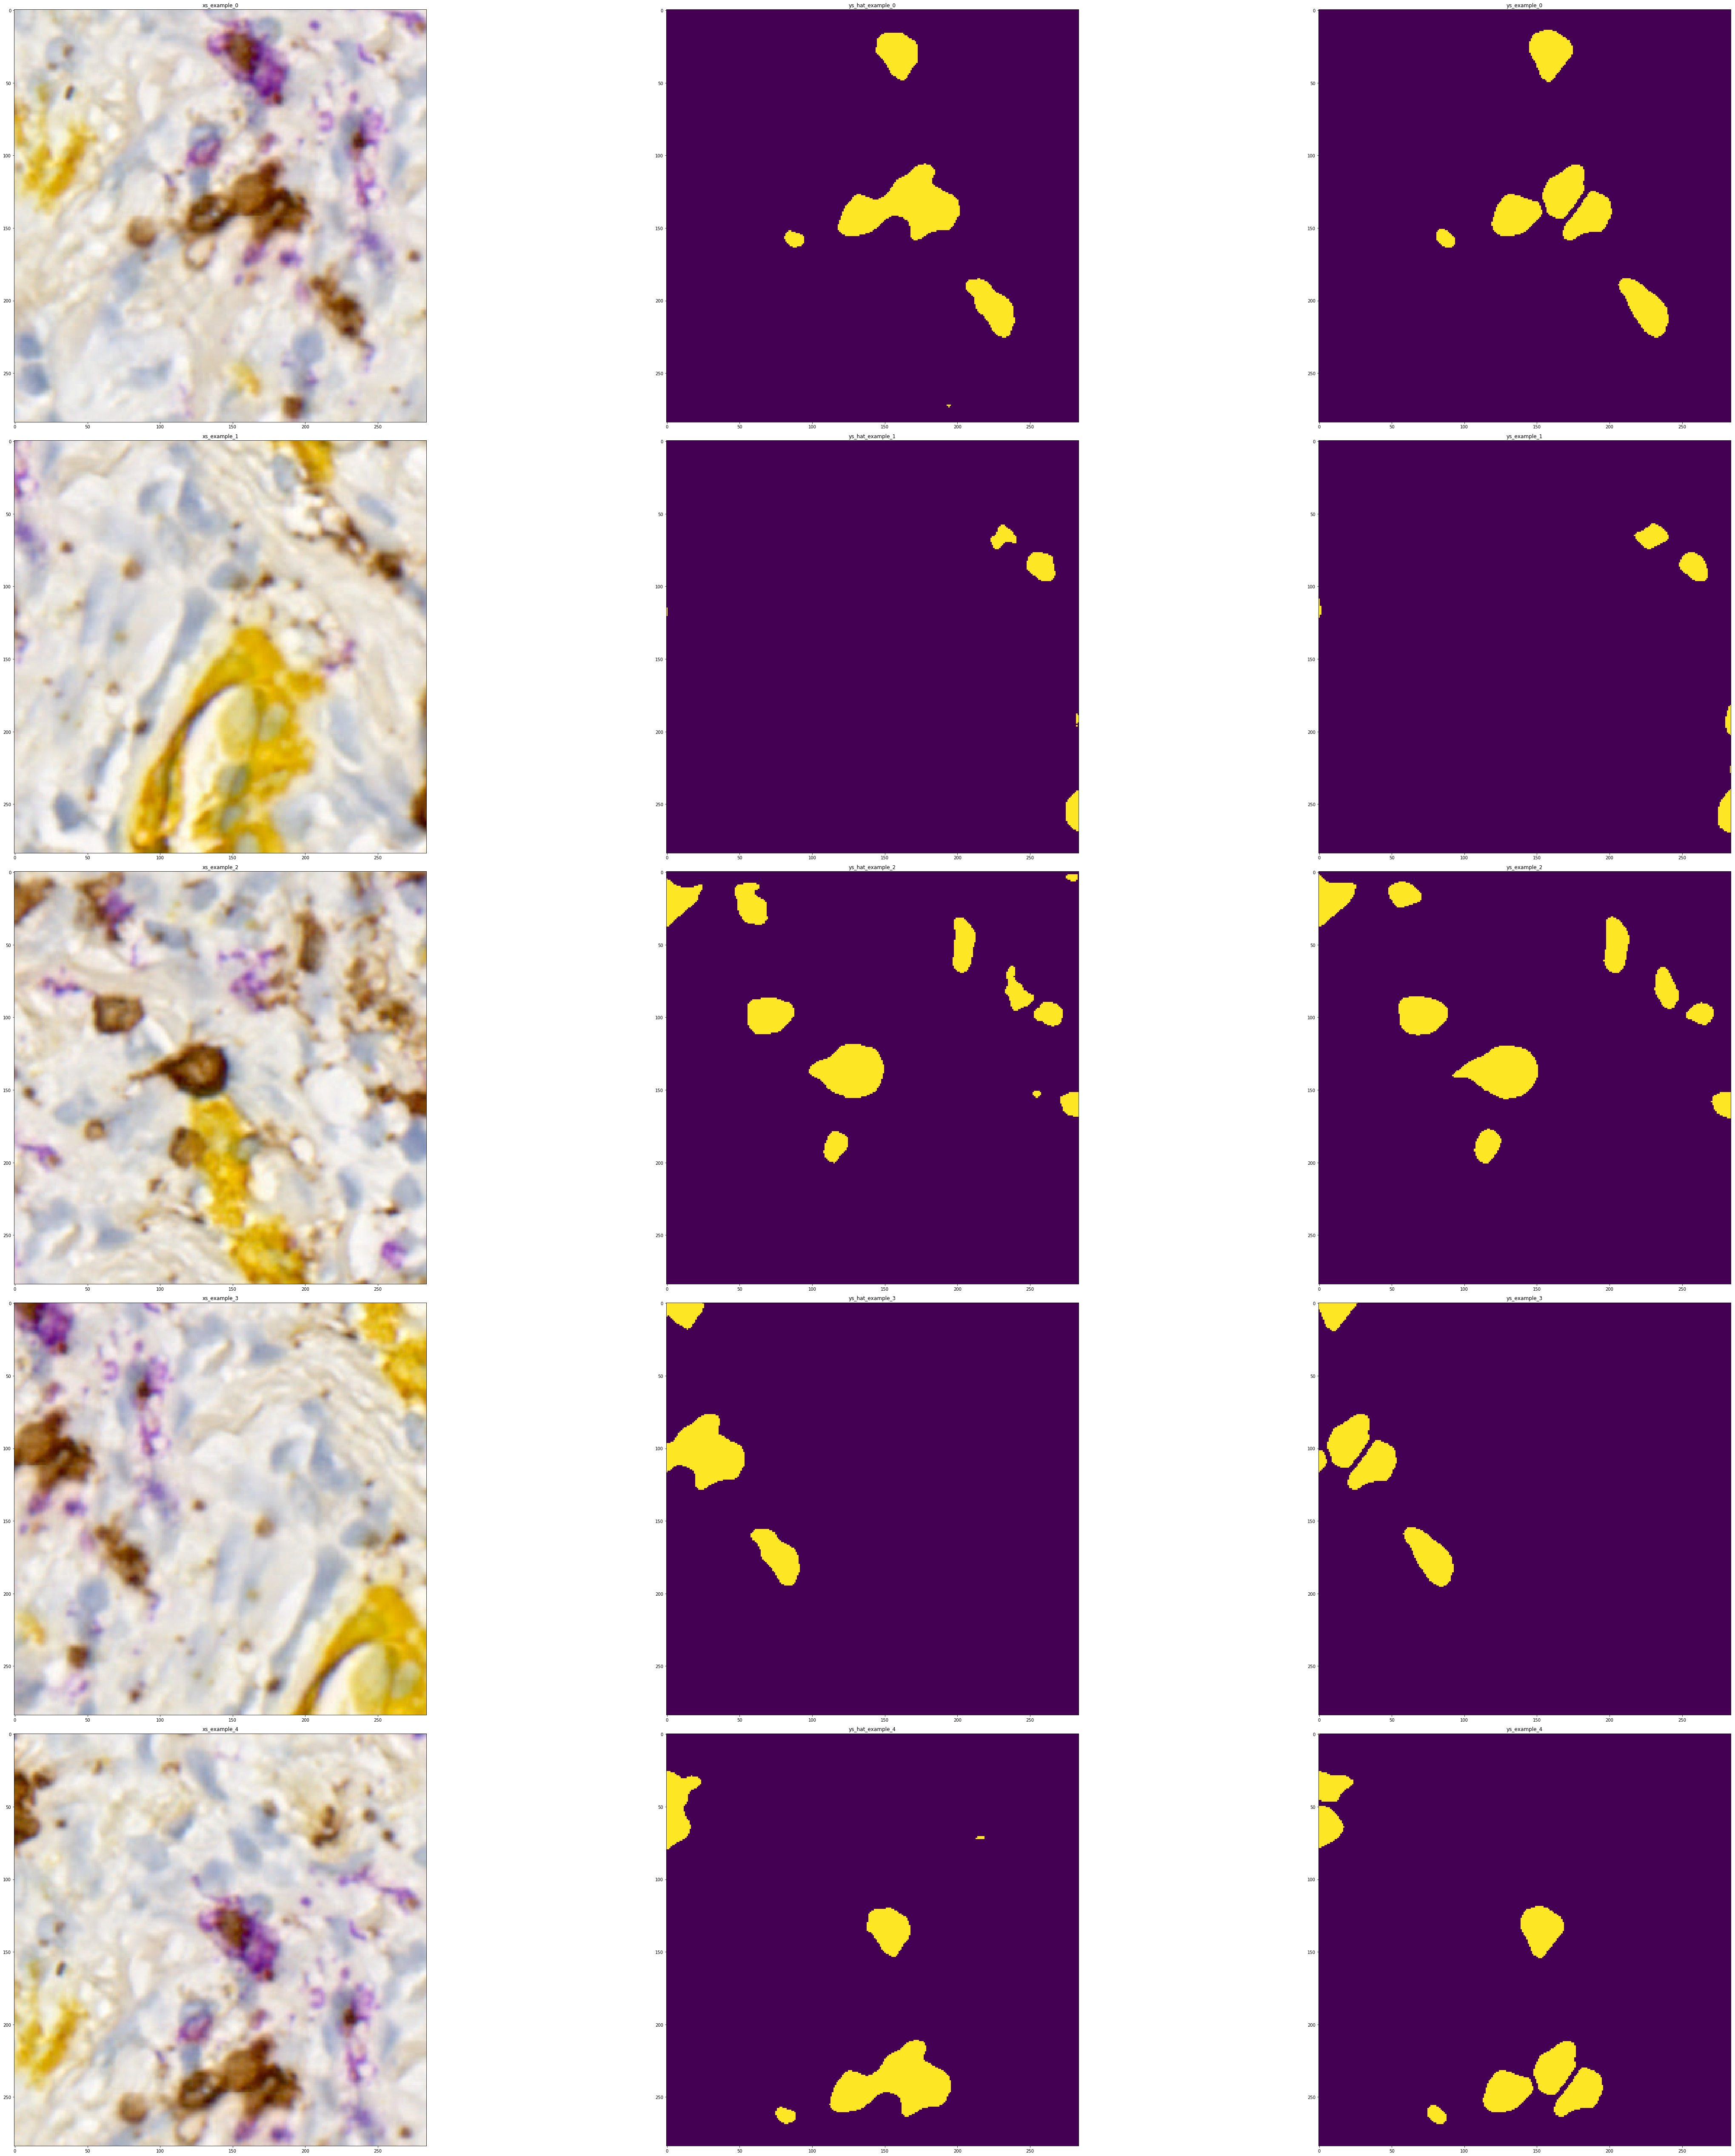

In [26]:
from utility import crop_receptive

y_hat = mimo.predict(x_data)
x_c = crop_receptive(xs,y_hat.shape[1:3])
y_c = crop_receptive(ys,y_hat.shape[1:3])

y_hat_imgs = from_categorical(y_hat)
y_imgs = from_categorical(y_c)

show_batches([x_c,y_hat_imgs,y_imgs],["xs","ys_hat","ys"])

In [15]:
from models import dice_coef, precision
model_input_size = input_patch_size + input_channels
#mimo2 = MimoNet(model_input_size, classes=output_channels[0], metrics=[dice_coef,precision], regularized=REG)

epocs = 100

ys_mod = np.copy(ys)
ys_mod[:,:,:,1][ys_mod[:,:,:,1]==1] = 10
x_data = (xs-means)/stds
for i in range(epocs):
    print("================== epoch: {} ==================".format(i+1))
    mimo2.fit(x_data,ys_mod)  

================== epoch: 1 ==================
Epoch 1/1
5/5 [==============================] - 4s 727ms/step - loss: 20.3091 - la1_loss: 0.0371 - la2_loss: 0.0426 - la3_loss: 0.0674 - l0_loss: 0.0811 - la1_dice_coef: 0.9735 - la1_precision: 0.9805 - la2_dice_coef: 0.9763 - la2_precision: 0.9825 - la3_dice_coef: 0.9778 - la3_precision: 0.9808 - l0_dice_coef: 0.9767 - l0_precision: 0.9825
================== epoch: 2 ==================
Epoch 1/1
5/5 [==============================] - 3s 692ms/step - loss: 20.1288 - la1_loss: 0.0287 - la2_loss: 0.0346 - la3_loss: 0.0573 - l0_loss: 0.0655 - la1_dice_coef: 0.9806 - la1_precision: 0.9837 - la2_dice_coef: 0.9820 - la2_precision: 0.9851 - la3_dice_coef: 0.9802 - la3_precision: 0.9824 - l0_dice_coef: 0.9815 - l0_precision: 0.9856
================== epoch: 3 ==================
Epoch 1/1
5/5 [==============================] - 3s 689ms/step - loss: 19.9715 - la1_loss: 0.0249 - la2_loss: 0.0302 - la3_loss: 0.0512 - l0_loss: 0.0585 - la1_dice_coef: 

5/5 [==============================] - 4s 705ms/step - loss: 15.7745 - la1_loss: 0.0176 - la2_loss: 0.0206 - la3_loss: 0.0350 - l0_loss: 0.0407 - la1_dice_coef: 0.9871 - la1_precision: 0.9904 - la2_dice_coef: 0.9883 - la2_precision: 0.9913 - la3_dice_coef: 0.9875 - la3_precision: 0.9907 - l0_dice_coef: 0.9887 - l0_precision: 0.9917
================== epoch: 43 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 15.6869 - la1_loss: 0.0176 - la2_loss: 0.0208 - la3_loss: 0.0349 - l0_loss: 0.0408 - la1_dice_coef: 0.9862 - la1_precision: 0.9904 - la2_dice_coef: 0.9875 - la2_precision: 0.9913 - la3_dice_coef: 0.9868 - la3_precision: 0.9907 - l0_dice_coef: 0.9879 - l0_precision: 0.9915
================== epoch: 44 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 15.6055 - la1_loss: 0.0187 - la2_loss: 0.0217 - la3_loss: 0.0362 - l0_loss: 0.0432 - la1_dice_coef: 0.9860 - la1_precision: 0.9890 - la2_dice_coef: 0.9875 

5/5 [==============================] - 3s 700ms/step - loss: 14.0998 - la1_loss: 0.0171 - la2_loss: 0.0205 - la3_loss: 0.0343 - l0_loss: 0.0404 - la1_dice_coef: 0.9855 - la1_precision: 0.9908 - la2_dice_coef: 0.9867 - la2_precision: 0.9913 - la3_dice_coef: 0.9861 - la3_precision: 0.9910 - l0_dice_coef: 0.9870 - l0_precision: 0.9915
================== epoch: 64 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 14.0260 - la1_loss: 0.0169 - la2_loss: 0.0200 - la3_loss: 0.0338 - l0_loss: 0.0397 - la1_dice_coef: 0.9884 - la1_precision: 0.9908 - la2_dice_coef: 0.9894 - la2_precision: 0.9916 - la3_dice_coef: 0.9885 - la3_precision: 0.9910 - l0_dice_coef: 0.9896 - l0_precision: 0.9915
================== epoch: 65 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 13.9552 - la1_loss: 0.0171 - la2_loss: 0.0201 - la3_loss: 0.0338 - l0_loss: 0.0400 - la1_dice_coef: 0.9870 - la1_precision: 0.9905 - la2_dice_coef: 0.9881 

5/5 [==============================] - 4s 704ms/step - loss: 12.6743 - la1_loss: 0.0150 - la2_loss: 0.0180 - la3_loss: 0.0303 - l0_loss: 0.0353 - la1_dice_coef: 0.9890 - la1_precision: 0.9922 - la2_dice_coef: 0.9899 - la2_precision: 0.9928 - la3_dice_coef: 0.9891 - la3_precision: 0.9925 - l0_dice_coef: 0.9902 - l0_precision: 0.9930
================== epoch: 85 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 12.6116 - la1_loss: 0.0149 - la2_loss: 0.0180 - la3_loss: 0.0302 - l0_loss: 0.0352 - la1_dice_coef: 0.9890 - la1_precision: 0.9924 - la2_dice_coef: 0.9900 - la2_precision: 0.9929 - la3_dice_coef: 0.9892 - la3_precision: 0.9927 - l0_dice_coef: 0.9902 - l0_precision: 0.9931
================== epoch: 86 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 12.5490 - la1_loss: 0.0149 - la2_loss: 0.0178 - la3_loss: 0.0301 - l0_loss: 0.0350 - la1_dice_coef: 0.9890 - la1_precision: 0.9923 - la2_dice_coef: 0.9899 

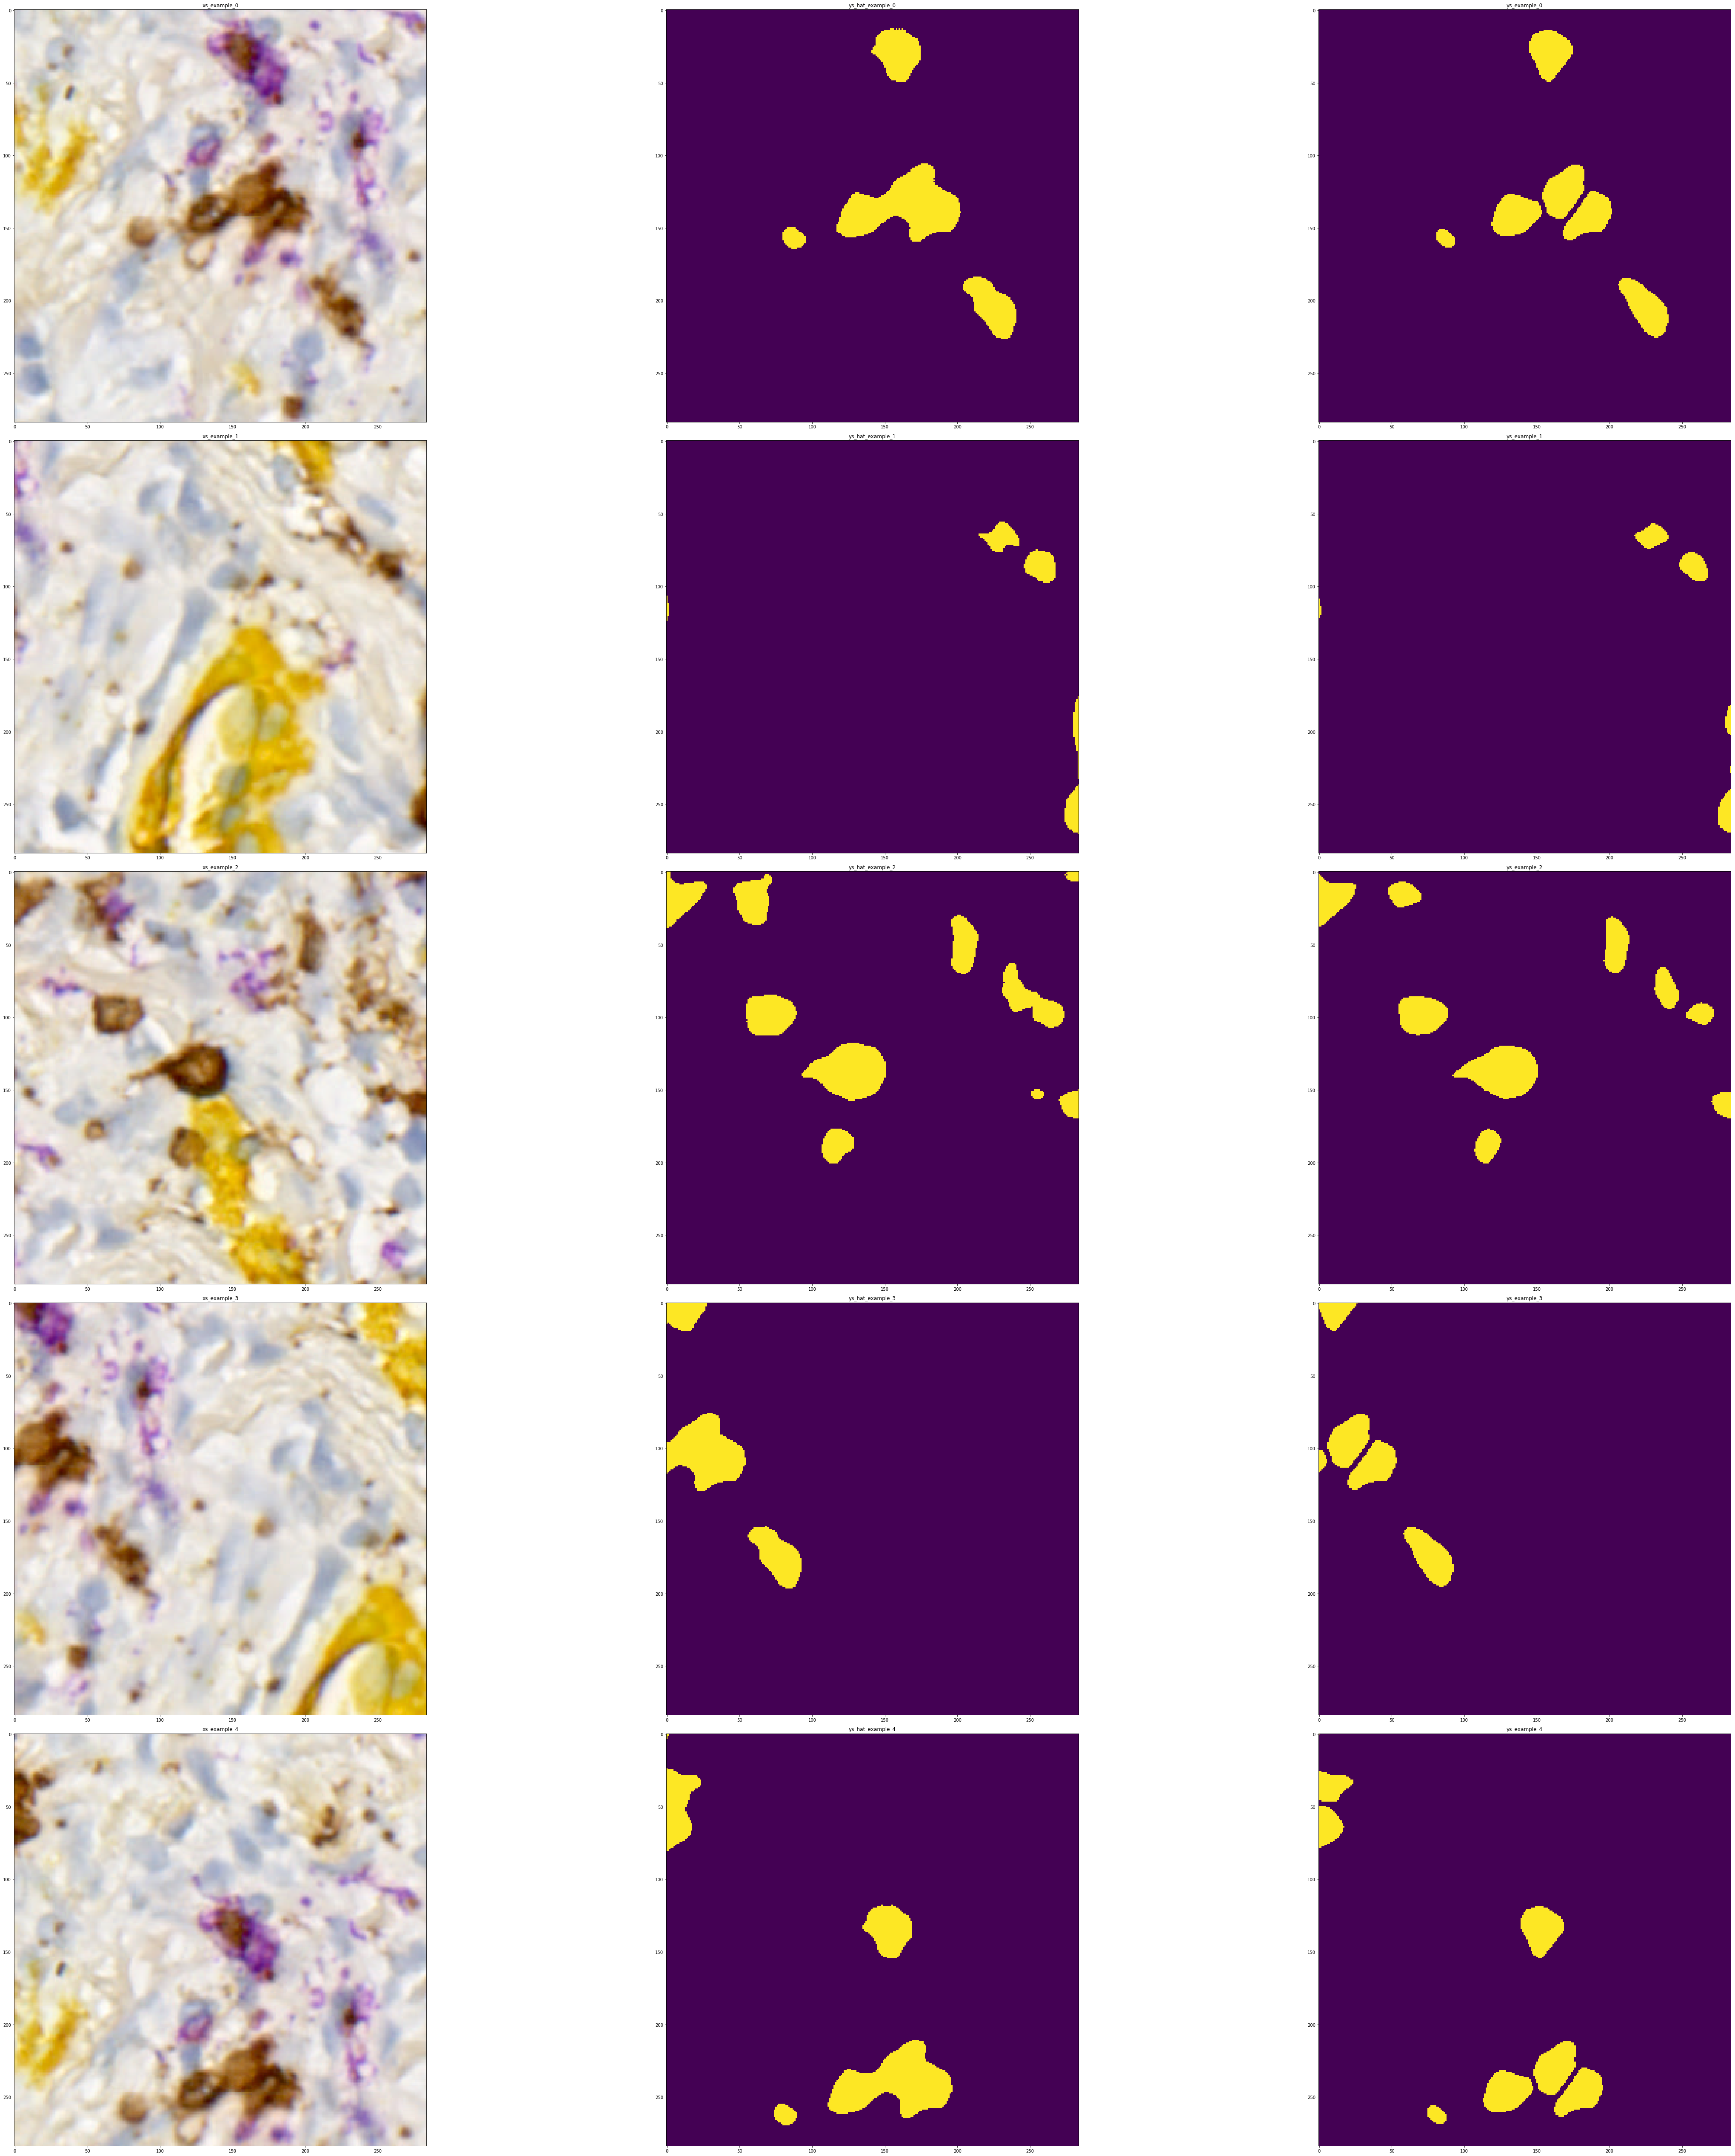

In [16]:
from utility import crop_receptive

y_hat = mimo2.predict(x_data)
x_c = crop_receptive(xs,y_hat.shape[1:3])
y_c = crop_receptive(ys,y_hat.shape[1:3])

y_hat_imgs = from_categorical(y_hat)
y_imgs = from_categorical(y_c)

show_batches([x_c,y_hat_imgs,y_imgs],["xs","ys_hat","ys"])

# WEIGHTING LABELS!!!!

In [18]:
from datasets import combine_y_w

In [23]:
from models import dice_coef, precision
model_input_size = input_patch_size + input_channels
mimo2 = MimoNet(model_input_size, classes=output_channels[0], metrics=[dice_coef,precision], regularized=REG)

epocs = 500

ys_mod = np.copy(ys)
ys_mod = combine_y_w(ys_mod,ws*10)
x_data = (xs-means)/stds
for i in range(epocs):
    print("================== epoch: {} ==================".format(i+1))
    
    mimo2.fit(x_data,ys_mod)  

aux confirmed
aux confirmed
================== epoch: 1 ==================
Epoch 1/1
5/5 [==============================] - 8s 2s/step - loss: 57.4469 - la1_loss: 0.1855 - la2_loss: 0.2299 - la3_loss: 0.3829 - l0_loss: 0.5647 - la1_dice_coef: 0.4954 - la1_precision: 0.3749 - la2_dice_coef: 0.5186 - la2_precision: 0.8962 - la3_dice_coef: 0.6024 - la3_precision: 0.9461 - l0_dice_coef: 0.5999 - l0_precision: 0.9635
================== epoch: 2 ==================
Epoch 1/1
5/5 [==============================] - 3s 695ms/step - loss: 55.5915 - la1_loss: 0.1708 - la2_loss: 0.2094 - la3_loss: 0.3102 - l0_loss: 0.4756 - la1_dice_coef: 0.5213 - la1_precision: 0.9487 - la2_dice_coef: 0.5527 - la2_precision: 0.9634 - la3_dice_coef: 0.6902 - la3_precision: 0.9636 - l0_dice_coef: 0.6819 - l0_precision: 0.9637
================== epoch: 3 ==================
Epoch 1/1
5/5 [==============================] - 3s 693ms/step - loss: 53.5227 - la1_loss: 0.1539 - la2_loss: 0.1828 - la3_loss: 0.2493 - l0_loss:

5/5 [==============================] - 4s 706ms/step - loss: 25.3192 - la1_loss: 0.0164 - la2_loss: 0.0185 - la3_loss: 0.0359 - l0_loss: 0.0523 - la1_dice_coef: 0.9674 - la1_precision: 0.9643 - la2_dice_coef: 0.9735 - la2_precision: 0.9748 - la3_dice_coef: 0.9748 - la3_precision: 0.9751 - l0_dice_coef: 0.9760 - l0_precision: 0.9762
================== epoch: 43 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 25.0125 - la1_loss: 0.0160 - la2_loss: 0.0184 - la3_loss: 0.0362 - l0_loss: 0.0526 - la1_dice_coef: 0.9667 - la1_precision: 0.9646 - la2_dice_coef: 0.9730 - la2_precision: 0.9752 - la3_dice_coef: 0.9740 - la3_precision: 0.9749 - l0_dice_coef: 0.9753 - l0_precision: 0.9759
================== epoch: 44 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 24.7108 - la1_loss: 0.0156 - la2_loss: 0.0181 - la3_loss: 0.0358 - l0_loss: 0.0518 - la1_dice_coef: 0.9667 - la1_precision: 0.9648 - la2_dice_coef: 0.9730 

5/5 [==============================] - 4s 702ms/step - loss: 20.0653 - la1_loss: 0.0144 - la2_loss: 0.0172 - la3_loss: 0.0341 - l0_loss: 0.0495 - la1_dice_coef: 0.9715 - la1_precision: 0.9723 - la2_dice_coef: 0.9756 - la2_precision: 0.9764 - la3_dice_coef: 0.9755 - la3_precision: 0.9759 - l0_dice_coef: 0.9769 - l0_precision: 0.9771
================== epoch: 64 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 19.8643 - la1_loss: 0.0141 - la2_loss: 0.0171 - la3_loss: 0.0342 - l0_loss: 0.0495 - la1_dice_coef: 0.9711 - la1_precision: 0.9738 - la2_dice_coef: 0.9753 - la2_precision: 0.9769 - la3_dice_coef: 0.9752 - la3_precision: 0.9761 - l0_dice_coef: 0.9765 - l0_precision: 0.9771
================== epoch: 65 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 19.6669 - la1_loss: 0.0142 - la2_loss: 0.0171 - la3_loss: 0.0340 - l0_loss: 0.0494 - la1_dice_coef: 0.9716 - la1_precision: 0.9733 - la2_dice_coef: 0.9758 

5/5 [==============================] - 4s 705ms/step - loss: 16.4614 - la1_loss: 0.0146 - la2_loss: 0.0179 - la3_loss: 0.0348 - l0_loss: 0.0517 - la1_dice_coef: 0.9739 - la1_precision: 0.9732 - la2_dice_coef: 0.9766 - la2_precision: 0.9756 - la3_dice_coef: 0.9761 - la3_precision: 0.9752 - l0_dice_coef: 0.9771 - l0_precision: 0.9761
================== epoch: 85 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 16.3215 - la1_loss: 0.0155 - la2_loss: 0.0187 - la3_loss: 0.0362 - l0_loss: 0.0538 - la1_dice_coef: 0.9683 - la1_precision: 0.9730 - la2_dice_coef: 0.9722 - la2_precision: 0.9747 - la3_dice_coef: 0.9731 - la3_precision: 0.9753 - l0_dice_coef: 0.9735 - l0_precision: 0.9753
================== epoch: 86 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 16.1743 - la1_loss: 0.0145 - la2_loss: 0.0178 - la3_loss: 0.0351 - l0_loss: 0.0516 - la1_dice_coef: 0.9720 - la1_precision: 0.9740 - la2_dice_coef: 0.9747 

5/5 [==============================] - 4s 704ms/step - loss: 13.8031 - la1_loss: 0.0126 - la2_loss: 0.0161 - la3_loss: 0.0323 - l0_loss: 0.0468 - la1_dice_coef: 0.9755 - la1_precision: 0.9774 - la2_dice_coef: 0.9770 - la2_precision: 0.9779 - la3_dice_coef: 0.9764 - la3_precision: 0.9771 - l0_dice_coef: 0.9775 - l0_precision: 0.9785
================== epoch: 106 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 13.6949 - la1_loss: 0.0128 - la2_loss: 0.0162 - la3_loss: 0.0325 - l0_loss: 0.0471 - la1_dice_coef: 0.9752 - la1_precision: 0.9773 - la2_dice_coef: 0.9767 - la2_precision: 0.9777 - la3_dice_coef: 0.9764 - la3_precision: 0.9771 - l0_dice_coef: 0.9774 - l0_precision: 0.9782
================== epoch: 107 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 13.5869 - la1_loss: 0.0127 - la2_loss: 0.0161 - la3_loss: 0.0324 - l0_loss: 0.0469 - la1_dice_coef: 0.9756 - la1_precision: 0.9772 - la2_dice_coef: 0.977

================== epoch: 126 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 11.7634 - la1_loss: 0.0121 - la2_loss: 0.0157 - la3_loss: 0.0316 - l0_loss: 0.0457 - la1_dice_coef: 0.9768 - la1_precision: 0.9783 - la2_dice_coef: 0.9777 - la2_precision: 0.9783 - la3_dice_coef: 0.9772 - la3_precision: 0.9777 - l0_dice_coef: 0.9782 - l0_precision: 0.9791
================== epoch: 127 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 11.6781 - la1_loss: 0.0121 - la2_loss: 0.0157 - la3_loss: 0.0315 - l0_loss: 0.0457 - la1_dice_coef: 0.9770 - la1_precision: 0.9781 - la2_dice_coef: 0.9779 - la2_precision: 0.9781 - la3_dice_coef: 0.9774 - la3_precision: 0.9776 - l0_dice_coef: 0.9784 - l0_precision: 0.9792
================== epoch: 128 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 11.5935 - la1_loss: 0.0121 - la2_loss: 0.0157 - la3_loss: 0.0316 - l0_loss: 0.0457 - la1_dice_

5/5 [==============================] - 4s 702ms/step - loss: 8.9091 - la1_loss: 0.0119 - la2_loss: 0.0158 - la3_loss: 0.0317 - l0_loss: 0.0460 - la1_dice_coef: 0.9770 - la1_precision: 0.9788 - la2_dice_coef: 0.9772 - la2_precision: 0.9783 - la3_dice_coef: 0.9771 - la3_precision: 0.9780 - l0_dice_coef: 0.9778 - l0_precision: 0.9798
================== epoch: 168 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 8.8500 - la1_loss: 0.0114 - la2_loss: 0.0154 - la3_loss: 0.0308 - l0_loss: 0.0444 - la1_dice_coef: 0.9788 - la1_precision: 0.9793 - la2_dice_coef: 0.9789 - la2_precision: 0.9786 - la3_dice_coef: 0.9782 - la3_precision: 0.9781 - l0_dice_coef: 0.9794 - l0_precision: 0.9800
================== epoch: 169 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 8.7936 - la1_loss: 0.0111 - la2_loss: 0.0151 - la3_loss: 0.0306 - l0_loss: 0.0439 - la1_dice_coef: 0.9785 - la1_precision: 0.9800 - la2_dice_coef: 0.9783 -

5/5 [==============================] - 4s 707ms/step - loss: 7.8339 - la1_loss: 0.0103 - la2_loss: 0.0148 - la3_loss: 0.0300 - l0_loss: 0.0424 - la1_dice_coef: 0.9802 - la1_precision: 0.9814 - la2_dice_coef: 0.9791 - la2_precision: 0.9795 - la3_dice_coef: 0.9784 - la3_precision: 0.9791 - l0_dice_coef: 0.9799 - l0_precision: 0.9812
================== epoch: 189 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 7.7884 - la1_loss: 0.0104 - la2_loss: 0.0148 - la3_loss: 0.0301 - l0_loss: 0.0426 - la1_dice_coef: 0.9801 - la1_precision: 0.9812 - la2_dice_coef: 0.9791 - la2_precision: 0.9792 - la3_dice_coef: 0.9786 - la3_precision: 0.9789 - l0_dice_coef: 0.9799 - l0_precision: 0.9809
================== epoch: 190 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 7.7416 - la1_loss: 0.0101 - la2_loss: 0.0147 - la3_loss: 0.0298 - l0_loss: 0.0420 - la1_dice_coef: 0.9804 - la1_precision: 0.9819 - la2_dice_coef: 0.9792 -

5/5 [==============================] - 4s 704ms/step - loss: 6.9463 - la1_loss: 0.0093 - la2_loss: 0.0144 - la3_loss: 0.0294 - l0_loss: 0.0403 - la1_dice_coef: 0.9815 - la1_precision: 0.9860 - la2_dice_coef: 0.9795 - la2_precision: 0.9803 - la3_dice_coef: 0.9785 - la3_precision: 0.9798 - l0_dice_coef: 0.9803 - l0_precision: 0.9829
================== epoch: 210 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 6.9078 - la1_loss: 0.0093 - la2_loss: 0.0144 - la3_loss: 0.0294 - l0_loss: 0.0402 - la1_dice_coef: 0.9819 - la1_precision: 0.9854 - la2_dice_coef: 0.9797 - la2_precision: 0.9800 - la3_dice_coef: 0.9788 - la3_precision: 0.9798 - l0_dice_coef: 0.9807 - l0_precision: 0.9826
================== epoch: 211 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 6.8701 - la1_loss: 0.0093 - la2_loss: 0.0144 - la3_loss: 0.0294 - l0_loss: 0.0403 - la1_dice_coef: 0.9817 - la1_precision: 0.9857 - la2_dice_coef: 0.9794 -

5/5 [==============================] - 4s 707ms/step - loss: 6.2092 - la1_loss: 0.0093 - la2_loss: 0.0144 - la3_loss: 0.0297 - l0_loss: 0.0393 - la1_dice_coef: 0.9823 - la1_precision: 0.9856 - la2_dice_coef: 0.9794 - la2_precision: 0.9807 - la3_dice_coef: 0.9786 - la3_precision: 0.9800 - l0_dice_coef: 0.9810 - l0_precision: 0.9839
================== epoch: 231 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 6.1782 - la1_loss: 0.0091 - la2_loss: 0.0147 - la3_loss: 0.0300 - l0_loss: 0.0396 - la1_dice_coef: 0.9825 - la1_precision: 0.9862 - la2_dice_coef: 0.9800 - la2_precision: 0.9798 - la3_dice_coef: 0.9790 - la3_precision: 0.9793 - l0_dice_coef: 0.9814 - l0_precision: 0.9834
================== epoch: 232 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 6.1416 - la1_loss: 0.0083 - la2_loss: 0.0140 - la3_loss: 0.0288 - l0_loss: 0.0372 - la1_dice_coef: 0.9830 - la1_precision: 0.9879 - la2_dice_coef: 0.9803 -

5/5 [==============================] - 4s 703ms/step - loss: 5.5849 - la1_loss: 0.0078 - la2_loss: 0.0137 - la3_loss: 0.0288 - l0_loss: 0.0345 - la1_dice_coef: 0.9849 - la1_precision: 0.9885 - la2_dice_coef: 0.9803 - la2_precision: 0.9819 - la3_dice_coef: 0.9788 - la3_precision: 0.9810 - l0_dice_coef: 0.9828 - l0_precision: 0.9868
================== epoch: 252 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 5.5579 - la1_loss: 0.0076 - la2_loss: 0.0138 - la3_loss: 0.0288 - l0_loss: 0.0342 - la1_dice_coef: 0.9839 - la1_precision: 0.9892 - la2_dice_coef: 0.9801 - la2_precision: 0.9822 - la3_dice_coef: 0.9788 - la3_precision: 0.9808 - l0_dice_coef: 0.9822 - l0_precision: 0.9883
================== epoch: 253 ==================
Epoch 1/1
5/5 [==============================] - 4s 708ms/step - loss: 5.5316 - la1_loss: 0.0077 - la2_loss: 0.0138 - la3_loss: 0.0288 - l0_loss: 0.0342 - la1_dice_coef: 0.9846 - la1_precision: 0.9888 - la2_dice_coef: 0.9807 -

5/5 [==============================] - 4s 703ms/step - loss: 5.0628 - la1_loss: 0.0071 - la2_loss: 0.0134 - la3_loss: 0.0284 - l0_loss: 0.0308 - la1_dice_coef: 0.9860 - la1_precision: 0.9897 - la2_dice_coef: 0.9810 - la2_precision: 0.9826 - la3_dice_coef: 0.9795 - la3_precision: 0.9808 - l0_dice_coef: 0.9843 - l0_precision: 0.9904
================== epoch: 273 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 5.0396 - la1_loss: 0.0070 - la2_loss: 0.0133 - la3_loss: 0.0284 - l0_loss: 0.0304 - la1_dice_coef: 0.9864 - la1_precision: 0.9897 - la2_dice_coef: 0.9811 - la2_precision: 0.9828 - la3_dice_coef: 0.9796 - la3_precision: 0.9809 - l0_dice_coef: 0.9847 - l0_precision: 0.9903
================== epoch: 274 ==================
Epoch 1/1
5/5 [==============================] - 4s 708ms/step - loss: 5.0181 - la1_loss: 0.0073 - la2_loss: 0.0134 - la3_loss: 0.0284 - l0_loss: 0.0308 - la1_dice_coef: 0.9860 - la1_precision: 0.9895 - la2_dice_coef: 0.9815 -

5/5 [==============================] - 4s 708ms/step - loss: 4.6178 - la1_loss: 0.0065 - la2_loss: 0.0129 - la3_loss: 0.0280 - l0_loss: 0.0275 - la1_dice_coef: 0.9873 - la1_precision: 0.9906 - la2_dice_coef: 0.9817 - la2_precision: 0.9837 - la3_dice_coef: 0.9798 - la3_precision: 0.9816 - l0_dice_coef: 0.9859 - l0_precision: 0.9911
================== epoch: 294 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 4.5977 - la1_loss: 0.0063 - la2_loss: 0.0128 - la3_loss: 0.0278 - l0_loss: 0.0271 - la1_dice_coef: 0.9876 - la1_precision: 0.9910 - la2_dice_coef: 0.9818 - la2_precision: 0.9839 - la3_dice_coef: 0.9799 - la3_precision: 0.9815 - l0_dice_coef: 0.9861 - l0_precision: 0.9915
================== epoch: 295 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 4.5786 - la1_loss: 0.0064 - la2_loss: 0.0128 - la3_loss: 0.0278 - l0_loss: 0.0270 - la1_dice_coef: 0.9874 - la1_precision: 0.9909 - la2_dice_coef: 0.9819 -

5/5 [==============================] - 4s 706ms/step - loss: 4.2387 - la1_loss: 0.0064 - la2_loss: 0.0128 - la3_loss: 0.0279 - l0_loss: 0.0262 - la1_dice_coef: 0.9881 - la1_precision: 0.9905 - la2_dice_coef: 0.9823 - la2_precision: 0.9839 - la3_dice_coef: 0.9803 - la3_precision: 0.9810 - l0_dice_coef: 0.9871 - l0_precision: 0.9914
================== epoch: 315 ==================
Epoch 1/1
5/5 [==============================] - 3s 700ms/step - loss: 4.2199 - la1_loss: 0.0060 - la2_loss: 0.0125 - la3_loss: 0.0276 - l0_loss: 0.0250 - la1_dice_coef: 0.9884 - la1_precision: 0.9912 - la2_dice_coef: 0.9823 - la2_precision: 0.9843 - la3_dice_coef: 0.9801 - la3_precision: 0.9817 - l0_dice_coef: 0.9874 - l0_precision: 0.9918
================== epoch: 316 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 4.2022 - la1_loss: 0.0059 - la2_loss: 0.0124 - la3_loss: 0.0274 - l0_loss: 0.0243 - la1_dice_coef: 0.9882 - la1_precision: 0.9918 - la2_dice_coef: 0.9823 -

5/5 [==============================] - 4s 707ms/step - loss: 3.9049 - la1_loss: 0.0058 - la2_loss: 0.0120 - la3_loss: 0.0270 - l0_loss: 0.0230 - la1_dice_coef: 0.9889 - la1_precision: 0.9917 - la2_dice_coef: 0.9827 - la2_precision: 0.9855 - la3_dice_coef: 0.9803 - la3_precision: 0.9824 - l0_dice_coef: 0.9883 - l0_precision: 0.9922
================== epoch: 336 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 3.8893 - la1_loss: 0.0054 - la2_loss: 0.0120 - la3_loss: 0.0270 - l0_loss: 0.0224 - la1_dice_coef: 0.9892 - la1_precision: 0.9924 - la2_dice_coef: 0.9832 - la2_precision: 0.9849 - la3_dice_coef: 0.9807 - la3_precision: 0.9822 - l0_dice_coef: 0.9885 - l0_precision: 0.9927
================== epoch: 337 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 3.8748 - la1_loss: 0.0056 - la2_loss: 0.0118 - la3_loss: 0.0269 - l0_loss: 0.0225 - la1_dice_coef: 0.9892 - la1_precision: 0.9921 - la2_dice_coef: 0.9831 -

5/5 [==============================] - 4s 705ms/step - loss: 3.6276 - la1_loss: 0.0075 - la2_loss: 0.0129 - la3_loss: 0.0282 - l0_loss: 0.0290 - la1_dice_coef: 0.9876 - la1_precision: 0.9888 - la2_dice_coef: 0.9823 - la2_precision: 0.9843 - la3_dice_coef: 0.9798 - la3_precision: 0.9814 - l0_dice_coef: 0.9872 - l0_precision: 0.9891
================== epoch: 357 ==================
Epoch 1/1
5/5 [==============================] - 4s 703ms/step - loss: 3.6092 - la1_loss: 0.0061 - la2_loss: 0.0125 - la3_loss: 0.0279 - l0_loss: 0.0253 - la1_dice_coef: 0.9885 - la1_precision: 0.9914 - la2_dice_coef: 0.9824 - la2_precision: 0.9847 - la3_dice_coef: 0.9800 - la3_precision: 0.9815 - l0_dice_coef: 0.9876 - l0_precision: 0.9909
================== epoch: 358 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 3.6014 - la1_loss: 0.0068 - la2_loss: 0.0132 - la3_loss: 0.0288 - l0_loss: 0.0275 - la1_dice_coef: 0.9880 - la1_precision: 0.9907 - la2_dice_coef: 0.9823 -

5/5 [==============================] - 4s 703ms/step - loss: 3.3677 - la1_loss: 0.0049 - la2_loss: 0.0112 - la3_loss: 0.0265 - l0_loss: 0.0201 - la1_dice_coef: 0.9899 - la1_precision: 0.9931 - la2_dice_coef: 0.9838 - la2_precision: 0.9866 - la3_dice_coef: 0.9810 - la3_precision: 0.9827 - l0_dice_coef: 0.9893 - l0_precision: 0.9933
================== epoch: 378 ==================
Epoch 1/1
5/5 [==============================] - 4s 704ms/step - loss: 3.3565 - la1_loss: 0.0049 - la2_loss: 0.0112 - la3_loss: 0.0264 - l0_loss: 0.0200 - la1_dice_coef: 0.9900 - la1_precision: 0.9932 - la2_dice_coef: 0.9838 - la2_precision: 0.9868 - la3_dice_coef: 0.9810 - la3_precision: 0.9828 - l0_dice_coef: 0.9894 - l0_precision: 0.9934
================== epoch: 379 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 3.3455 - la1_loss: 0.0048 - la2_loss: 0.0112 - la3_loss: 0.0264 - l0_loss: 0.0199 - la1_dice_coef: 0.9902 - la1_precision: 0.9933 - la2_dice_coef: 0.9840 -

5/5 [==============================] - 4s 704ms/step - loss: 3.1516 - la1_loss: 0.0054 - la2_loss: 0.0112 - la3_loss: 0.0265 - l0_loss: 0.0214 - la1_dice_coef: 0.9894 - la1_precision: 0.9922 - la2_dice_coef: 0.9832 - la2_precision: 0.9869 - la3_dice_coef: 0.9802 - la3_precision: 0.9836 - l0_dice_coef: 0.9889 - l0_precision: 0.9926
================== epoch: 399 ==================
Epoch 1/1
5/5 [==============================] - 4s 702ms/step - loss: 3.1436 - la1_loss: 0.0054 - la2_loss: 0.0116 - la3_loss: 0.0271 - l0_loss: 0.0222 - la1_dice_coef: 0.9896 - la1_precision: 0.9925 - la2_dice_coef: 0.9837 - la2_precision: 0.9860 - la3_dice_coef: 0.9807 - la3_precision: 0.9824 - l0_dice_coef: 0.9890 - l0_precision: 0.9927
================== epoch: 400 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 3.1298 - la1_loss: 0.0048 - la2_loss: 0.0110 - la3_loss: 0.0263 - l0_loss: 0.0199 - la1_dice_coef: 0.9904 - la1_precision: 0.9934 - la2_dice_coef: 0.9843 -

5/5 [==============================] - 4s 706ms/step - loss: 2.9547 - la1_loss: 0.0047 - la2_loss: 0.0105 - la3_loss: 0.0257 - l0_loss: 0.0191 - la1_dice_coef: 0.9903 - la1_precision: 0.9935 - la2_dice_coef: 0.9847 - la2_precision: 0.9875 - la3_dice_coef: 0.9812 - la3_precision: 0.9834 - l0_dice_coef: 0.9898 - l0_precision: 0.9935
================== epoch: 420 ==================
Epoch 1/1
5/5 [==============================] - 4s 708ms/step - loss: 2.9475 - la1_loss: 0.0048 - la2_loss: 0.0109 - la3_loss: 0.0263 - l0_loss: 0.0196 - la1_dice_coef: 0.9902 - la1_precision: 0.9932 - la2_dice_coef: 0.9843 - la2_precision: 0.9871 - la3_dice_coef: 0.9811 - la3_precision: 0.9828 - l0_dice_coef: 0.9897 - l0_precision: 0.9935
================== epoch: 421 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 2.9375 - la1_loss: 0.0047 - la2_loss: 0.0105 - la3_loss: 0.0258 - l0_loss: 0.0190 - la1_dice_coef: 0.9903 - la1_precision: 0.9934 - la2_dice_coef: 0.9844 -

5/5 [==============================] - 4s 702ms/step - loss: 2.7801 - la1_loss: 0.0044 - la2_loss: 0.0102 - la3_loss: 0.0255 - l0_loss: 0.0176 - la1_dice_coef: 0.9910 - la1_precision: 0.9938 - la2_dice_coef: 0.9855 - la2_precision: 0.9880 - la3_dice_coef: 0.9819 - la3_precision: 0.9833 - l0_dice_coef: 0.9907 - l0_precision: 0.9941
================== epoch: 441 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 2.7724 - la1_loss: 0.0043 - la2_loss: 0.0103 - la3_loss: 0.0256 - l0_loss: 0.0176 - la1_dice_coef: 0.9911 - la1_precision: 0.9940 - la2_dice_coef: 0.9851 - la2_precision: 0.9880 - la3_dice_coef: 0.9817 - la3_precision: 0.9833 - l0_dice_coef: 0.9908 - l0_precision: 0.9943
================== epoch: 442 ==================
Epoch 1/1
5/5 [==============================] - 4s 708ms/step - loss: 2.7637 - la1_loss: 0.0043 - la2_loss: 0.0101 - la3_loss: 0.0253 - l0_loss: 0.0172 - la1_dice_coef: 0.9912 - la1_precision: 0.9940 - la2_dice_coef: 0.9852 -

5/5 [==============================] - 4s 703ms/step - loss: 2.6213 - la1_loss: 0.0043 - la2_loss: 0.0099 - la3_loss: 0.0250 - l0_loss: 0.0170 - la1_dice_coef: 0.9915 - la1_precision: 0.9941 - la2_dice_coef: 0.9856 - la2_precision: 0.9890 - la3_dice_coef: 0.9818 - la3_precision: 0.9846 - l0_dice_coef: 0.9913 - l0_precision: 0.9945
================== epoch: 462 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 2.6154 - la1_loss: 0.0046 - la2_loss: 0.0099 - la3_loss: 0.0250 - l0_loss: 0.0179 - la1_dice_coef: 0.9910 - la1_precision: 0.9936 - la2_dice_coef: 0.9860 - la2_precision: 0.9883 - la3_dice_coef: 0.9818 - la3_precision: 0.9838 - l0_dice_coef: 0.9908 - l0_precision: 0.9937
================== epoch: 463 ==================
Epoch 1/1
5/5 [==============================] - 4s 707ms/step - loss: 2.6071 - la1_loss: 0.0043 - la2_loss: 0.0098 - la3_loss: 0.0250 - l0_loss: 0.0170 - la1_dice_coef: 0.9913 - la1_precision: 0.9940 - la2_dice_coef: 0.9859 -

5/5 [==============================] - 4s 701ms/step - loss: 2.4750 - la1_loss: 0.0039 - la2_loss: 0.0094 - la3_loss: 0.0245 - l0_loss: 0.0155 - la1_dice_coef: 0.9920 - la1_precision: 0.9946 - la2_dice_coef: 0.9864 - la2_precision: 0.9893 - la3_dice_coef: 0.9822 - la3_precision: 0.9841 - l0_dice_coef: 0.9918 - l0_precision: 0.9949
================== epoch: 483 ==================
Epoch 1/1
5/5 [==============================] - 4s 705ms/step - loss: 2.4691 - la1_loss: 0.0041 - la2_loss: 0.0094 - la3_loss: 0.0245 - l0_loss: 0.0160 - la1_dice_coef: 0.9915 - la1_precision: 0.9942 - la2_dice_coef: 0.9864 - la2_precision: 0.9895 - la3_dice_coef: 0.9823 - la3_precision: 0.9844 - l0_dice_coef: 0.9915 - l0_precision: 0.9947
================== epoch: 484 ==================
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 2.4627 - la1_loss: 0.0041 - la2_loss: 0.0093 - la3_loss: 0.0245 - l0_loss: 0.0161 - la1_dice_coef: 0.9920 - la1_precision: 0.9943 - la2_dice_coef: 0.9865 -

In [28]:
mimo.save_model('mimo_without_weights')

Saved model to disk


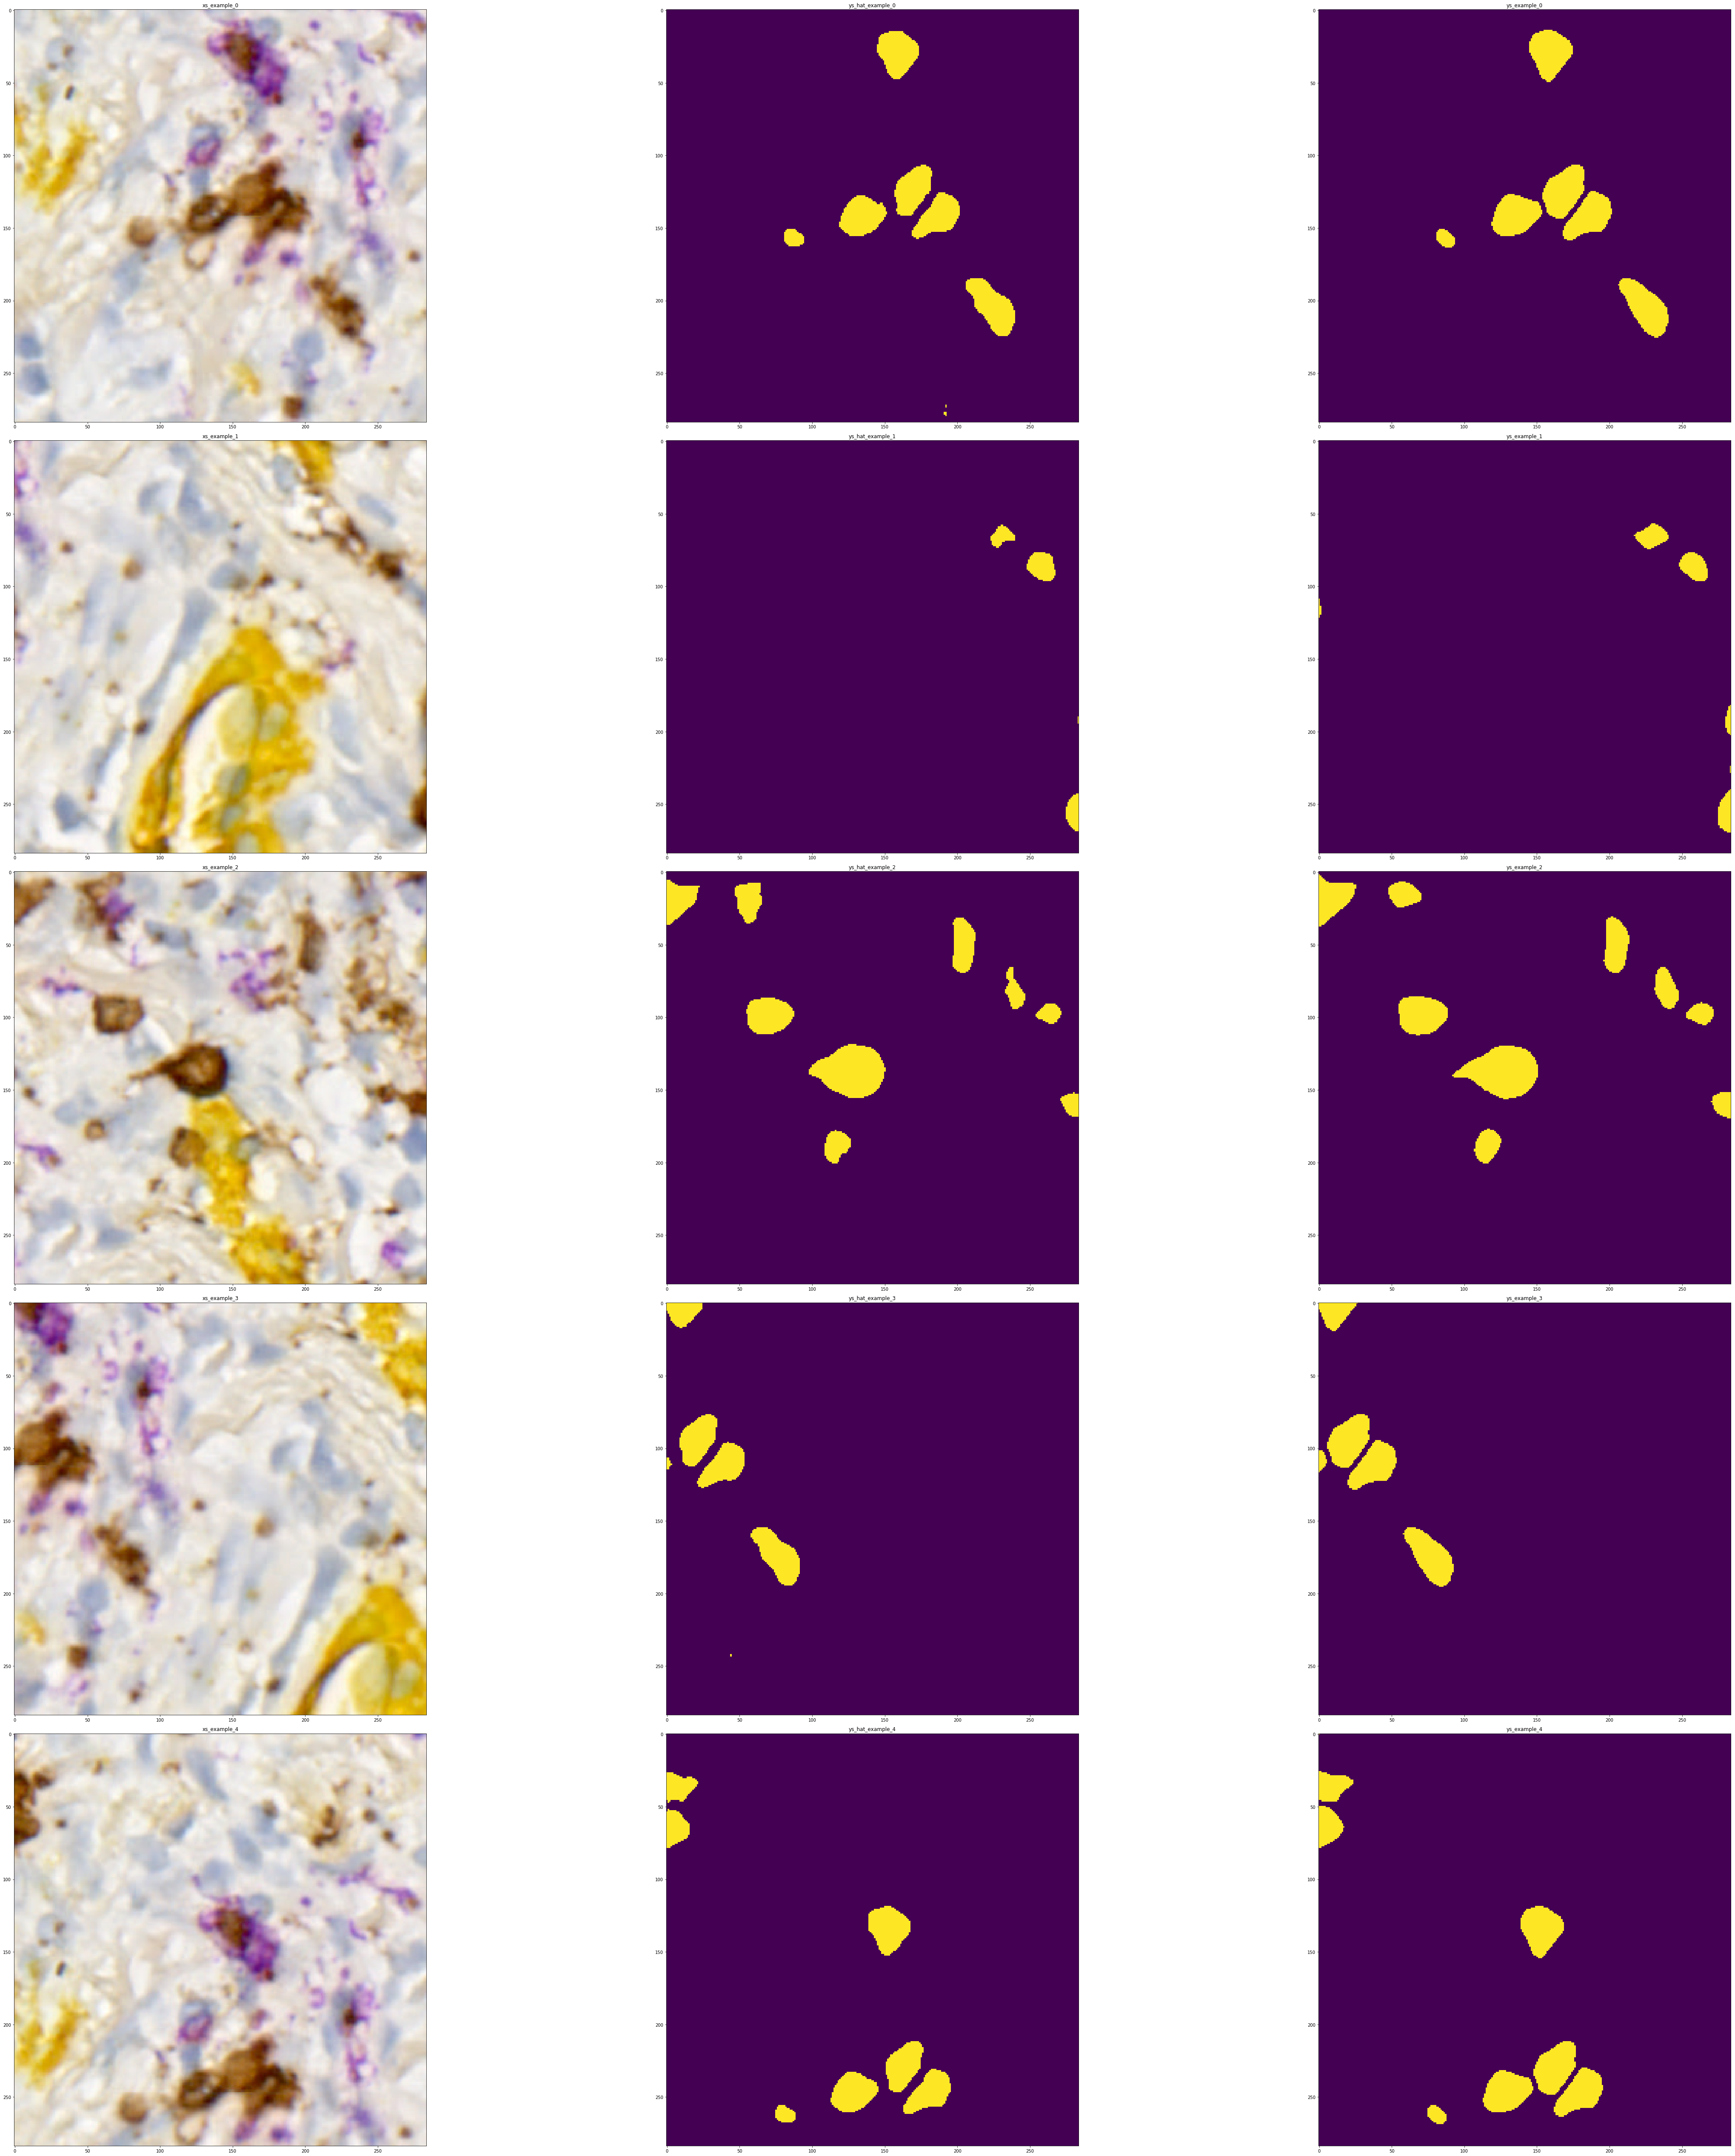

In [24]:
from utility import crop_receptive

y_hat = mimo2.predict(x_data)
x_c = crop_receptive(xs,y_hat.shape[1:3])
y_c = crop_receptive(ys,y_hat.shape[1:3])

y_hat_imgs = from_categorical(y_hat)
y_imgs = from_categorical(y_c)

show_batches([x_c,y_hat_imgs,y_imgs],["xs","ys_hat","ys"])

In [ ]:
model_input_size = input_patch_size + input_channels
#mimo = MimoNet(model_input_size, classes=output_channels[0], regularized=REG)
histo = train(mimo2,dataset,n_batch=NBATCH,epochs=EPCS,just_train=JT,use_weights=USEW, W=200)

=========== iteration 1/500 =============
Epoch 1/1
10/10 [==============================] - 2s 159ms/step
=========== iteration 2/500 =============
Epoch 1/1
10/10 [==============================] - 2s 151ms/step
=========== iteration 3/500 =============
Epoch 1/1
10/10 [==============================] - 2s 150ms/step
=========== iteration 4/500 =============
Epoch 1/1
10/10 [==============================] - 2s 151ms/step
=========== iteration 5/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 6/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 7/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 8/500 =============
Epoch 1/1
10/10 [==============================] - 2s 155ms/step
=========== iteration 9/500 =============
Epoch 1/1
10/10 [==============================] - 1s 145ms/step
=========== iteration 10/500 ========

10/10 [==============================] - 1s 148ms/step
=========== iteration 25/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 26/500 =============
Epoch 1/1
10/10 [==============================] - 1s 147ms/step
=========== iteration 27/500 =============
Epoch 1/1
10/10 [==============================] - 2s 150ms/step
=========== iteration 28/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 29/500 =============
Epoch 1/1
10/10 [==============================] - 2s 160ms/step
=========== iteration 30/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 31/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 32/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 33/500 =============
Epoch 1/1
10/10 [=====================

10/10 [==============================] - 1s 149ms/step
=========== iteration 48/500 =============
Epoch 1/1
10/10 [==============================] - 1s 150ms/step
=========== iteration 49/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 50/500 =============
Epoch 1/1
10/10 [==============================] - 2s 154ms/step
=========== iteration 51/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 52/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 53/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 54/500 =============
Epoch 1/1
10/10 [==============================] - 2s 151ms/step
=========== iteration 55/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 56/500 =============
Epoch 1/1
10/10 [=====================

10/10 [==============================] - 1s 149ms/step
=========== iteration 71/500 =============
Epoch 1/1
10/10 [==============================] - 2s 159ms/step
=========== iteration 72/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 73/500 =============
Epoch 1/1
10/10 [==============================] - 2s 150ms/step
=========== iteration 74/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 75/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 76/500 =============
Epoch 1/1
10/10 [==============================] - 1s 147ms/step
=========== iteration 77/500 =============
Epoch 1/1
10/10 [==============================] - 2s 151ms/step
=========== iteration 78/500 =============
Epoch 1/1
10/10 [==============================] - 2s 160ms/step
=========== iteration 79/500 =============
Epoch 1/1
10/10 [=====================

10/10 [==============================] - 1s 147ms/step
=========== iteration 94/500 =============
Epoch 1/1
10/10 [==============================] - 1s 147ms/step
=========== iteration 95/500 =============
Epoch 1/1
10/10 [==============================] - 1s 150ms/step
=========== iteration 96/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 97/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 98/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 99/500 =============
Epoch 1/1
10/10 [==============================] - 2s 153ms/step
=========== iteration 100/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 101/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 102/500 =============
Epoch 1/1
10/10 [==================

10/10 [==============================] - 1s 150ms/step
=========== iteration 117/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 118/500 =============
Epoch 1/1
10/10 [==============================] - 1s 147ms/step
=========== iteration 119/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 120/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 121/500 =============
Epoch 1/1
10/10 [==============================] - 2s 160ms/step
=========== iteration 122/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 123/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 124/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 125/500 =============
Epoch 1/1
10/10 [============

10/10 [==============================] - 1s 148ms/step
=========== iteration 140/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 141/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 142/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 143/500 =============
Epoch 1/1
10/10 [==============================] - 2s 159ms/step
=========== iteration 144/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 145/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 146/500 =============
Epoch 1/1
10/10 [==============================] - 1s 147ms/step
=========== iteration 147/500 =============
Epoch 1/1
10/10 [==============================] - 1s 149ms/step
=========== iteration 148/500 =============
Epoch 1/1
10/10 [============

10/10 [==============================] - 1s 149ms/step
=========== iteration 163/500 =============
Epoch 1/1
10/10 [==============================] - 1s 148ms/step
=========== iteration 164/500 =============
Epoch 1/1
10/10 [==============================] - 2s 160ms/step
=========== iteration 165/500 =============
Epoch 1/1
10/10 [==============================] - 1s 147ms/step
=========== iteration 166/500 =============
Epoch 1/1
5/5 [==============================] - 2s 463ms/step - loss: 0.6827 - la1_loss: 0.0143 - la2_loss: 0.0205 - la3_loss: 0.0574 - l0_loss: 0.1254 - la1_dice_coef: 0.9456 - la2_dice_coef: 0.9373 - la3_dice_coef: 0.9433 - l0_dice_coef: 0.9368


In [168]:
mimo2.save_model(NAME_NET)
eval_histo = np.array(histo[0])
train_histo = np.array(histo[1])
train_histo.dump(NAME_NET+'3_train_histo.pkl')
eval_histo.dump(NAME_NET+'3_eval_histo.pkl')

Saved model to disk


In [160]:
input_patch_size = [375,375] # input patch (expect output to be smaller)
model_input_size = input_patch_size + input_channels
model_input_size = input_patch_size + input_channels
mimo2 = MimoNet(model_input_size, classes=output_channels[0], regularized=True)
mimo2.load_model(NAME_NET)
train_histo = np.load(NAME_NET+'_train_histo.pkl')
eval_histo = np.load(NAME_NET+'_eval_histo.pkl')

aux confirmed
aux confirmed


In [77]:
input_patch_size = [350,350] # input patch (expect output to be smaller)
model_input_size = input_patch_size + input_channels
mimo = MimoNet(model_input_size, classes=output_channels[0], regularized=True)
mimo.load_model('MIMO_1')

aux confirmed
aux confirmed


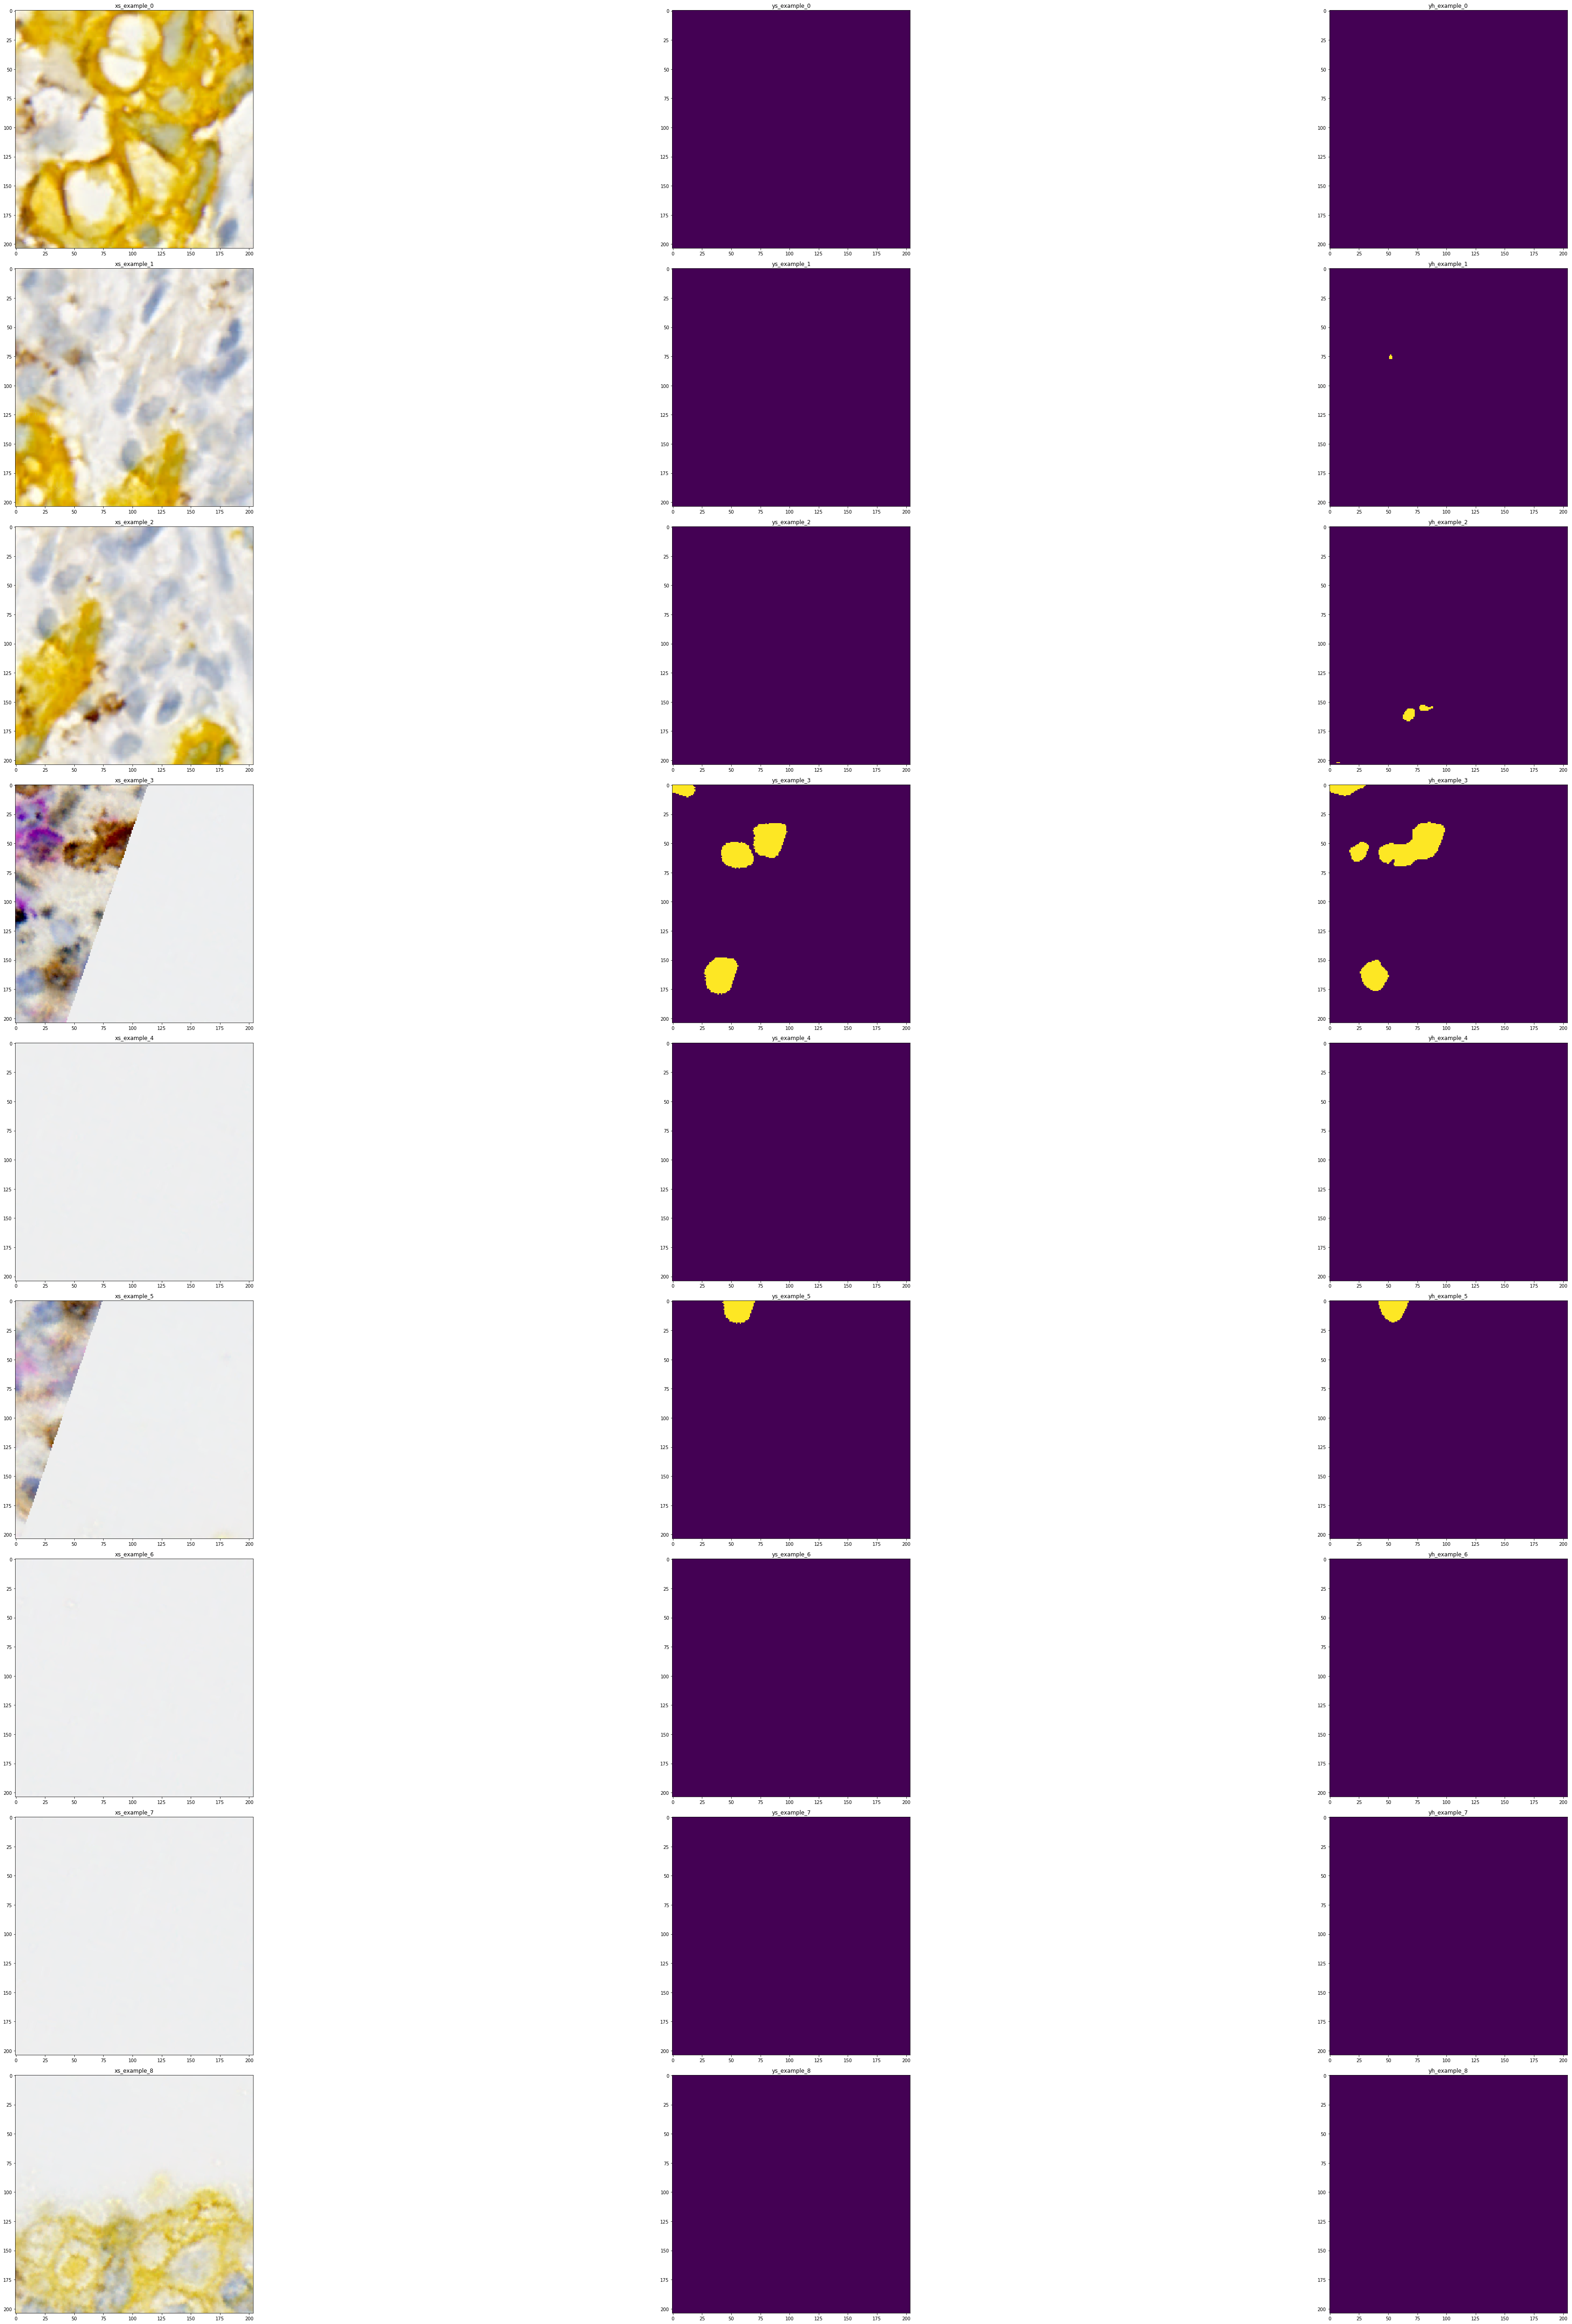

In [163]:
x_,y_,y_hat = evaluate(mimo2,dataset)
y_imgs = from_categorical(y_)
y_hat_imgs = from_categorical(y_hat)
show_batches([(x_*stds)+means,y_imgs,y_hat_imgs],["xs","ys","yh"])

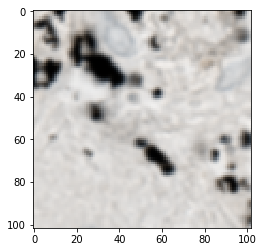

In [32]:
pre

In [164]:
def predict_full_image(model,x):
    h,w,_ = x.shape
    h_in,w_in,_ = model.inputs_shape[0]
    h_out,w_out,cy = model.outputs_shape[0]
    y_hat = np.zeros([h,w,cy])
    gap_h = (h_in-h_out)
    gap_w = (w_in-w_out)
    step_h = h_in - gap_h
    step_w = w_in - gap_w
    i,j = h_in,w_in
    crops_h_start = (i-h_in)+gap_h//2+gap_h%2
    crops_w_start = (j-w_in)+gap_w//2+gap_w%2
    crops_h_end,crops_w_end = 0,0
    
    while i<h:
        j = w_in
        while j<w:
            # Extract patch from image
            patch_x = np.expand_dims(x[i-h_in:i,j-w_in:j],0)
            # Predict patch with model
            patch_y_hat = model.predict(patch_x)
            # Copy to y
            crop_h_from = (i-h_in)+gap_h//2+gap_h%2
            crop_h_to = i-gap_h//2
            crop_w_from = (j-w_in)+gap_w//2+gap_w%2
            crop_w_to = j-gap_w//2
            y_hat[crop_h_from : crop_h_to, crop_w_from : crop_w_to] = patch_y_hat
            crops_h_end,crops_w_end = crop_h_to,crop_w_to
            j+=step_w
        i+=step_h
    return from_categorical(np.expand_dims(y_hat,0))[0],[[crops_h_start,crops_h_end],\
                                                         [crops_w_start,crops_w_end]]

#X,Y,W = dataset.get_X_Y_W()
Y_hat3,crops3 = predict_full_image(mimo2,X)


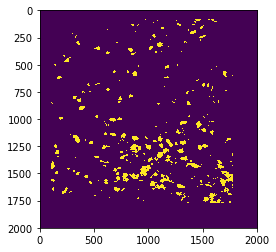

In [83]:
def predict_full_image(model,x):
    h,w,_ = x.shape
    h_in,w_in,_ = model.inputs_shape[0]
    h_out,w_out,cy = model.outputs_shape[0]
    y_hat = np.zeros([h,w,cy])
    gap_h = (h_in-h_out)
    gap_w = (w_in-w_out)
    step_h = h_in - gap_h
    step_w = w_in - gap_w
    i,j = h_in,w_in
    crops_h_start = (i-h_in)+gap_h//2+gap_h%2
    crops_w_start = (j-w_in)+gap_w//2+gap_w%2
    crops_h_end,crops_w_end = 0,0
    
    while i<h:
        j = w_in
        while j<w:
            # Extract patch from image
            patch_x = np.expand_dims(x[i-h_in:i,j-w_in:j],0)
            # Predict patch with model
            patch_y_hat = model.predict(patch_x)
            # Copy to y
            crop_h_from = (i-h_in)+gap_h//2+gap_h%2
            crop_h_to = i-gap_h//2
            crop_w_from = (j-w_in)+gap_w//2+gap_w%2
            crop_w_to = j-gap_w//2
            y_hat[crop_h_from : crop_h_to, crop_w_from : crop_w_to] = patch_y_hat
            crops_h_end,crops_w_end = crop_h_to,crop_w_to
            j+=step_w
        i+=step_h
    return from_categorical(np.expand_dims(y_hat,0))[0],[[crops_h_start,crops_h_end],\
                                                         [crops_w_start,crops_w_end]]

#X,Y,W = dataset.get_X_Y_W()
Y_hat,crops = predict_full_image(mimo,X)
plt.imshow(Y_hat)


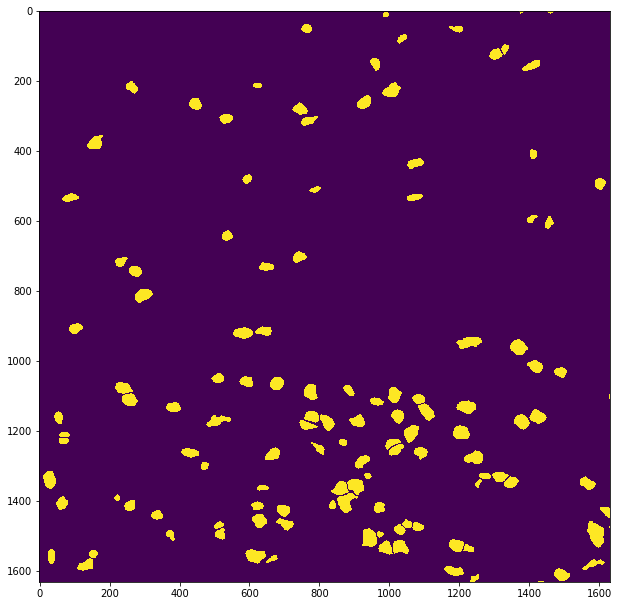

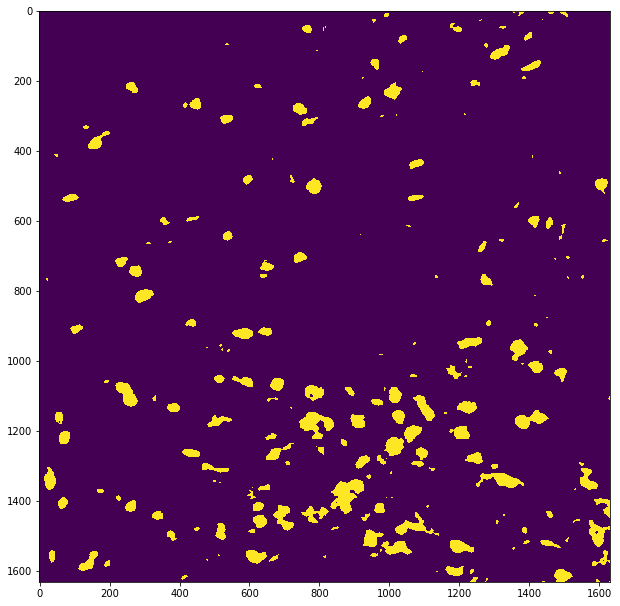

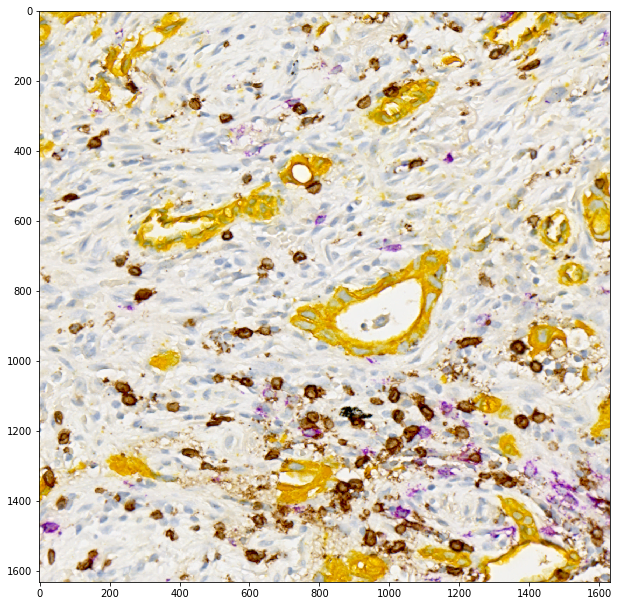

In [165]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
Yim = from_categorical(np.expand_dims(Y,0))[0]
cropsh,cropsw = crops2
plt.imshow(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(Y_hat3[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(X[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]*stds + means)
plt.show()


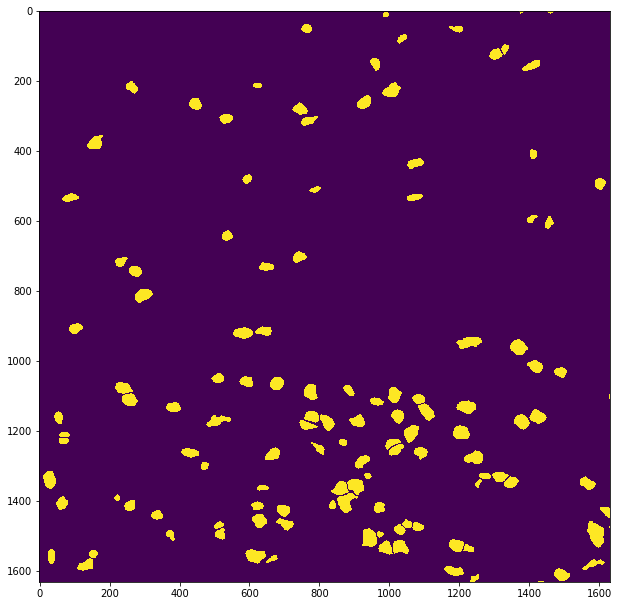

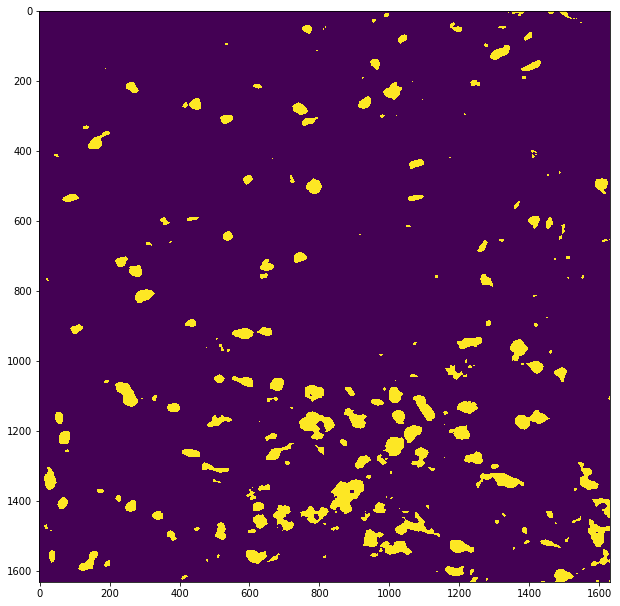

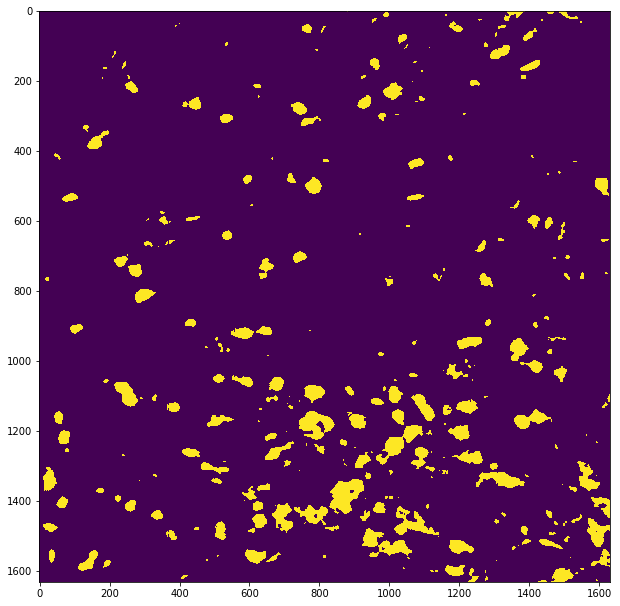

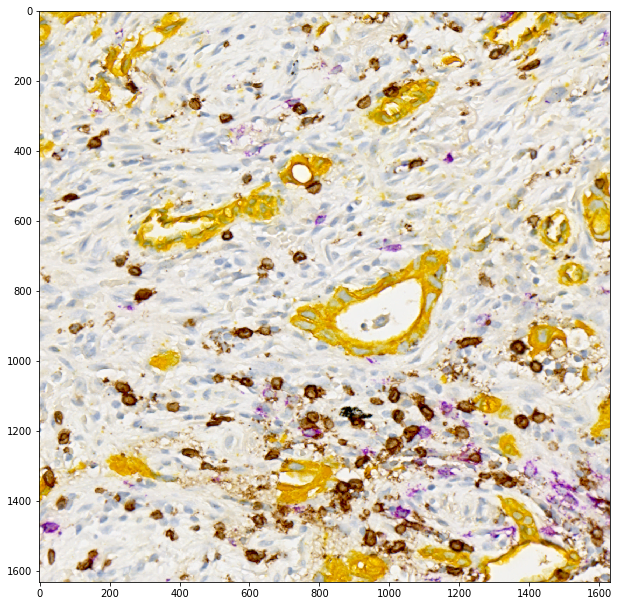

In [152]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
Yim = from_categorical(np.expand_dims(Y,0))[0]
cropsh,cropsw = crops2
plt.imshow(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(Y_hat2[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(X[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]*stds + means)
plt.show()

0.755489305319 0.788407243975


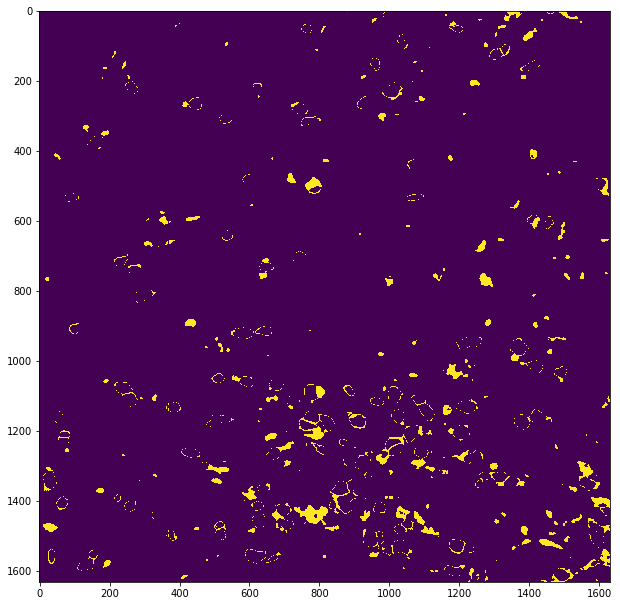

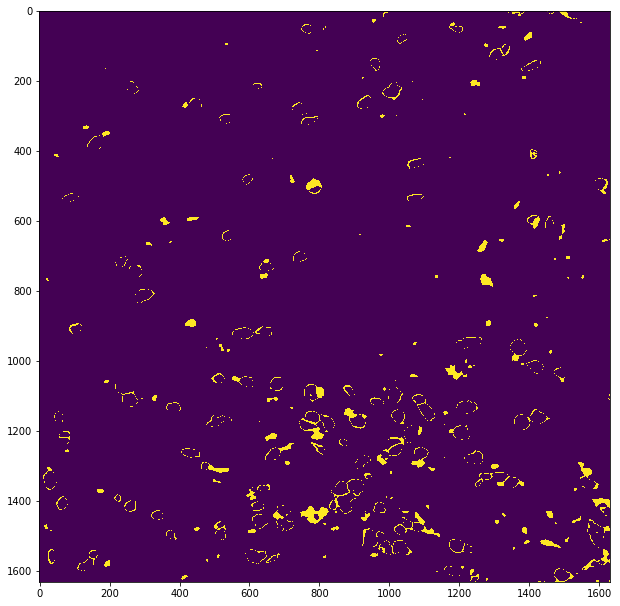

In [101]:
def dice(y_true, y_pred):
    """
    Attention: 
    y_true can be weighted to modify learning therefore 
    apply sign to get back to labels
    y_pred have to be rounded to nearest integer to obtain labels.
    """
    smooth = 1.
    y_true_f = y_true.flatten()
    y_pred_f =  y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

dic = dice(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
dic2 = dice(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat2[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
print dic, dic2

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(abs(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]-Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]))
plt.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(abs(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]-Y_hat2[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]))
plt.show()

In [166]:
from scipy.ndimage.morphology import distance_transform_edt, binary_erosion

def dice(y_true, y_pred):
    """
    Attention: 
    y_true can be weighted to modify learning therefore 
    apply sign to get back to labels
    y_pred have to be rounded to nearest integer to obtain labels.
    """
    smooth = 1.
    y_true_f = y_true.flatten()
    y_pred_f =  y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

def true_pos(y_true, y_pred):
    return np.sum(y_true * y_pred)

def false_pos(y_true, y_pred):
     return np.sum(y_true * (1. - (y_pred)))

def false_neg(y_true, y_pred):
     return np.sum((1. - y_true) * (y_pred))

def precision(y_true, y_pred):
     return true_pos(y_true, y_pred) / \
         (true_pos(y_true, y_pred) + false_pos(y_true, y_pred))

def Pc(Y,Y_hat,tetha=5):
    Bgt = Y - binary_erosion(Y,structure=np.ones((3,3)))
    Bps = Y_hat - binary_erosion(Y_hat,structure=np.ones((3,3)))
    D = distance_transform_edt(1-Bgt)
    D_Bpd = D[Bps==1.0]
    return np.sum(D_Bpd<tetha)/(float(np.sum(Bgt==1.0)) + 1)

def Jaccardy(y_true,y_pred):
    smooth = 1.
    y_true_f = y_true.flatten()
    y_pred_f =  y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f)**2 + np.sum(y_pred_f)**2 + smooth)
    
Pic = Pc(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
Pic2 = Pc(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat3[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
print Pic,Pic2

Prec = precision(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
Prec2 = precision(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat3[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
print Prec,Prec2

dic = dice(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
dic2 = dice(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat3[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
print dic, dic2


jac = Jaccardy(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
jac2 = Jaccardy(Yim[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat3[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
print jac, jac2

0.915585548898 0.870847635115
0.93044858288 0.857974159187
0.755489305319 0.799057226124
5.31235119486e-06 6.64128210466e-06
